EXAMINING THE RELATIONSHIPS BETWEEN FEATURES AND A RESPONSE

In [1]:
import numpy as np #numerical computations
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#next line helps with renderig plots
%matplotlib inline
import matplotlib as mpl #add'1 plotting functionality
import seaborn as sns #fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures
df=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\python\FEBRUARYMARCH PYTHON.csv")


In [2]:
#CREATE A LIST OF ALL THE DTAFRAME COLUMS
features_response = df.columns.tolist()

In [3]:
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [4]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

#remember sex is to be omitted, pay_2...6 are incorrect and to be ignored, education_cat is not required, ID has nothing to do with our response variable and should be removed

In [6]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [8]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<Axes: >

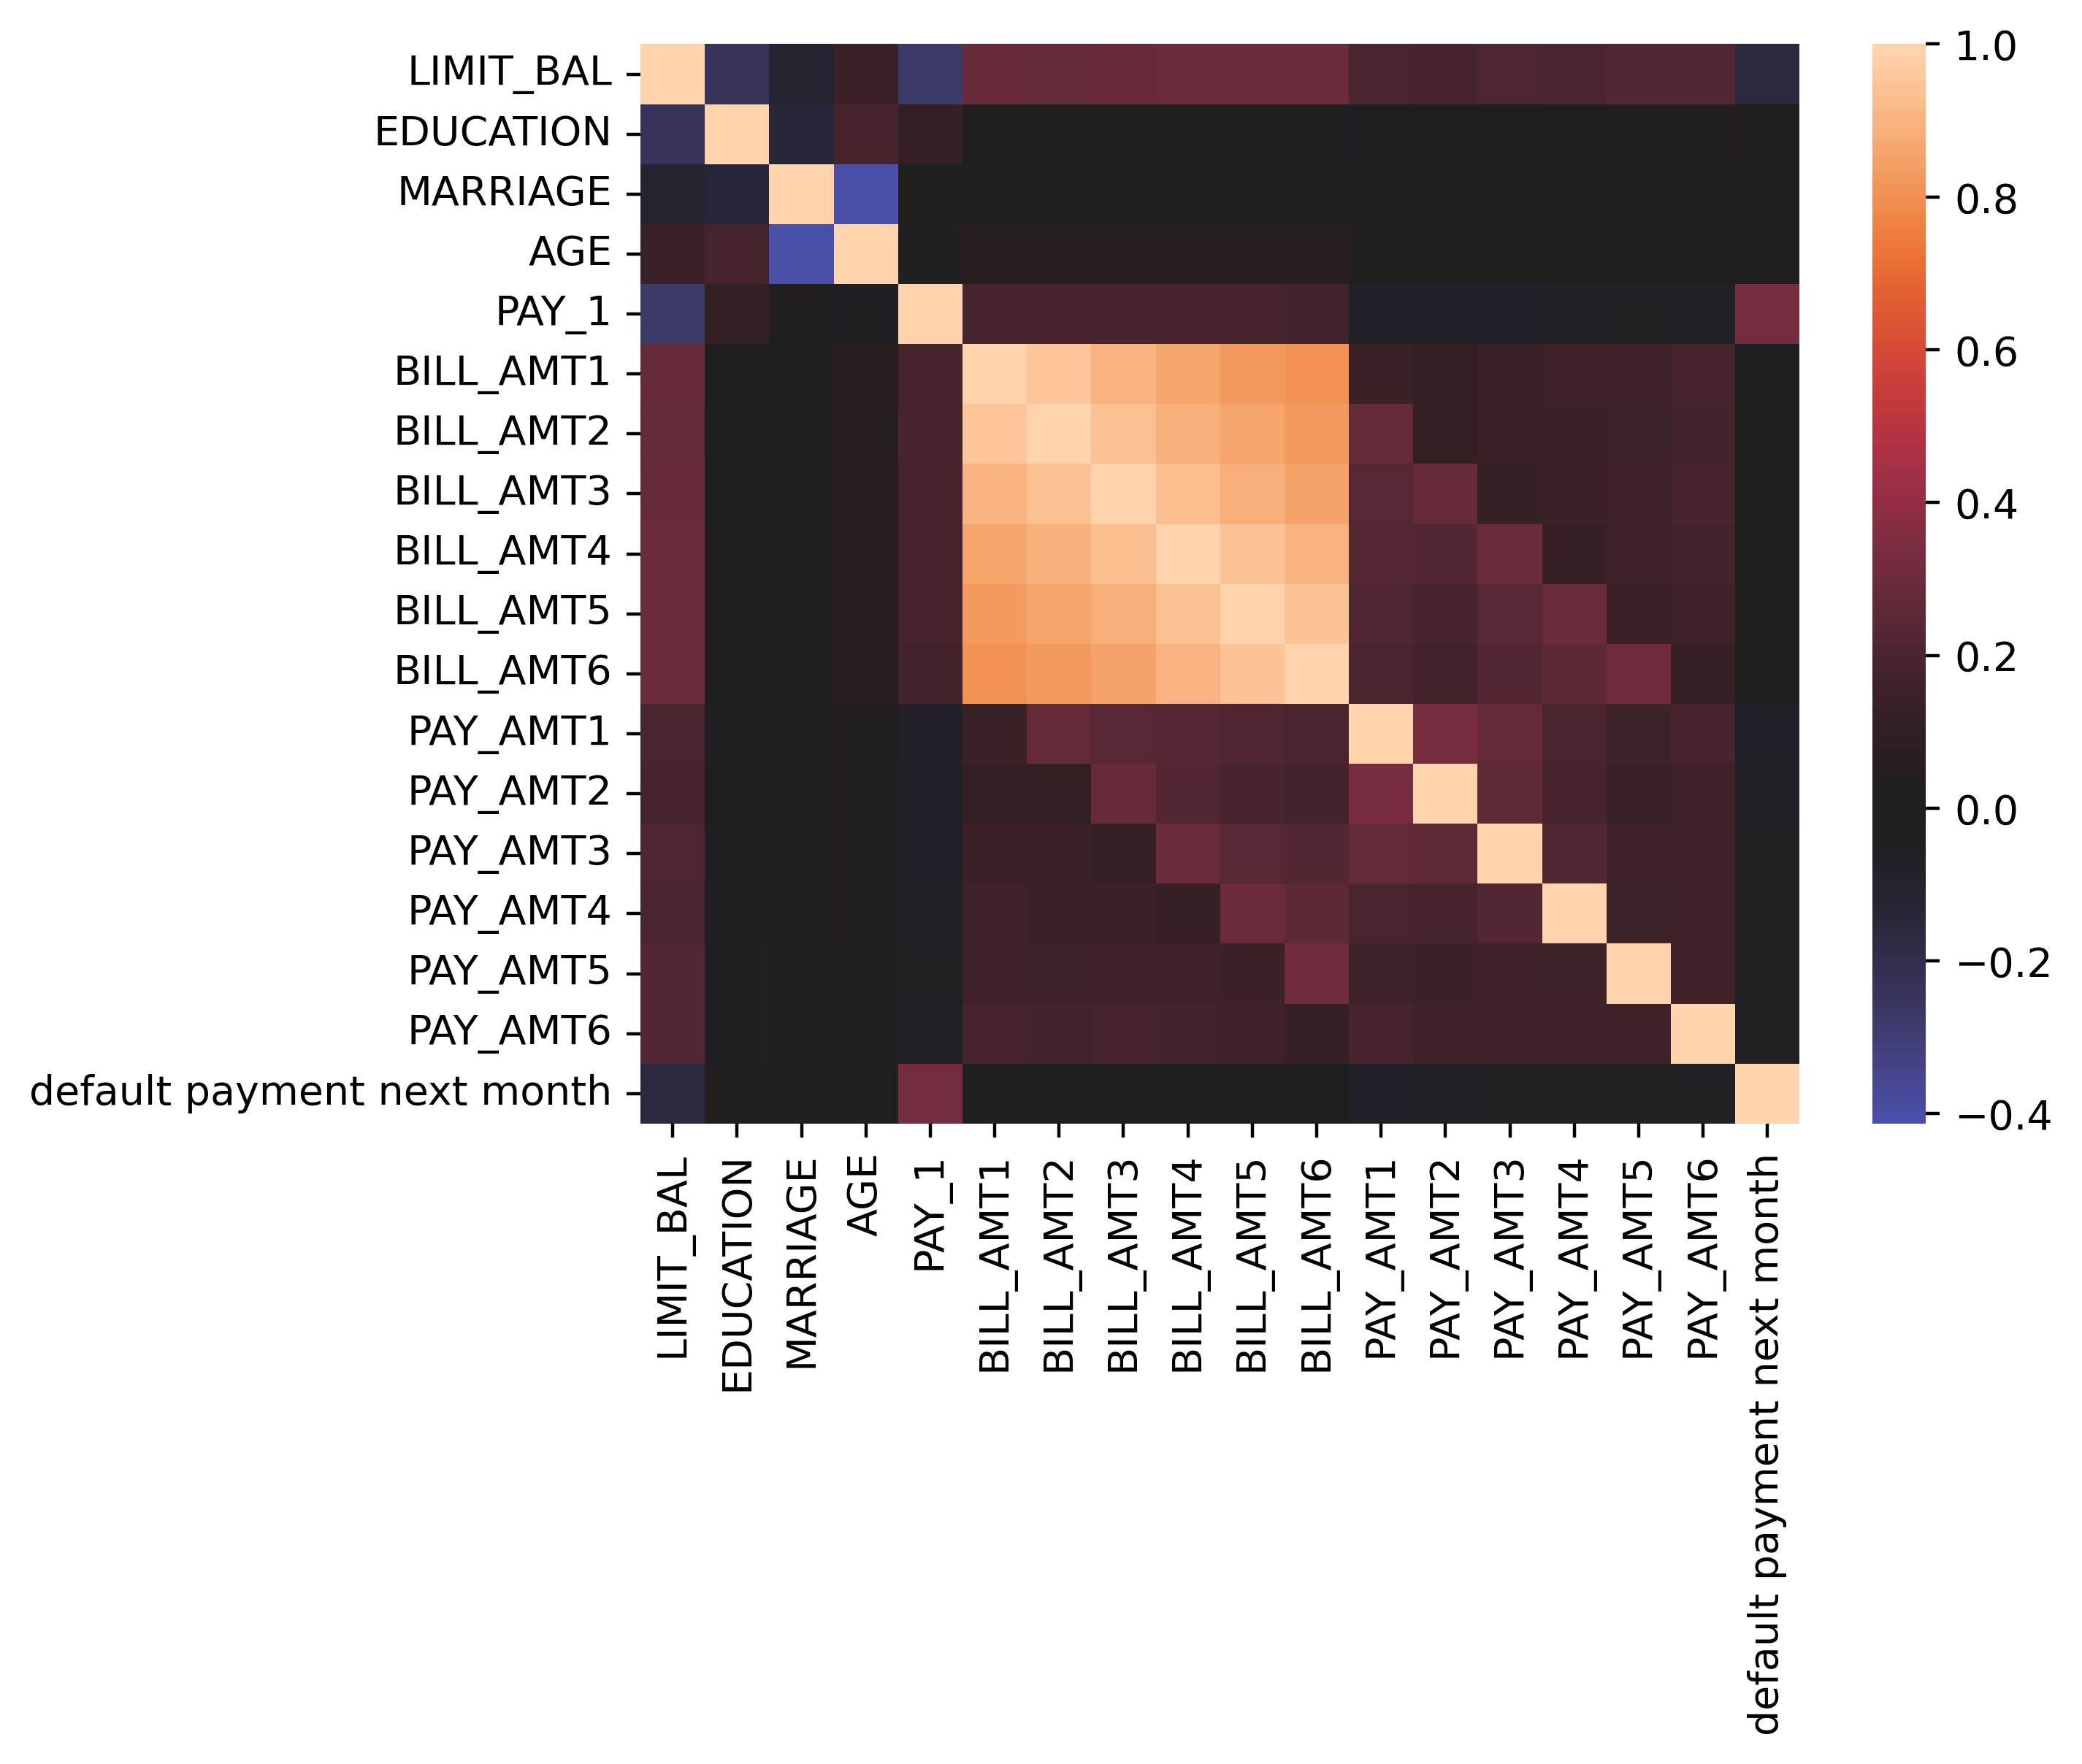

In [10]:
#CREATING A HEAT MAP OF CORRELATIONS
sns.heatmap(corr,
            xticklabels= corr.columns.values,
            yticklabels= corr.columns.values,
            center = 0) #colorbar 0 makes it so that negative and positive correlation are distinguishable
            

from heat map only two features have a correlaton with target variable. limit balance and pay_1
however limit balance is negatively correlated. every other feature seems to be a zero correlation.

In [11]:
df_sample = df[['LIMIT_BAL', 'PAY_1', 'default payment next month']].sample(frac=0.1, replace=False, random_state=1, axis=0)

In [12]:
from pandas.plotting import scatter_matrix

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\sit

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

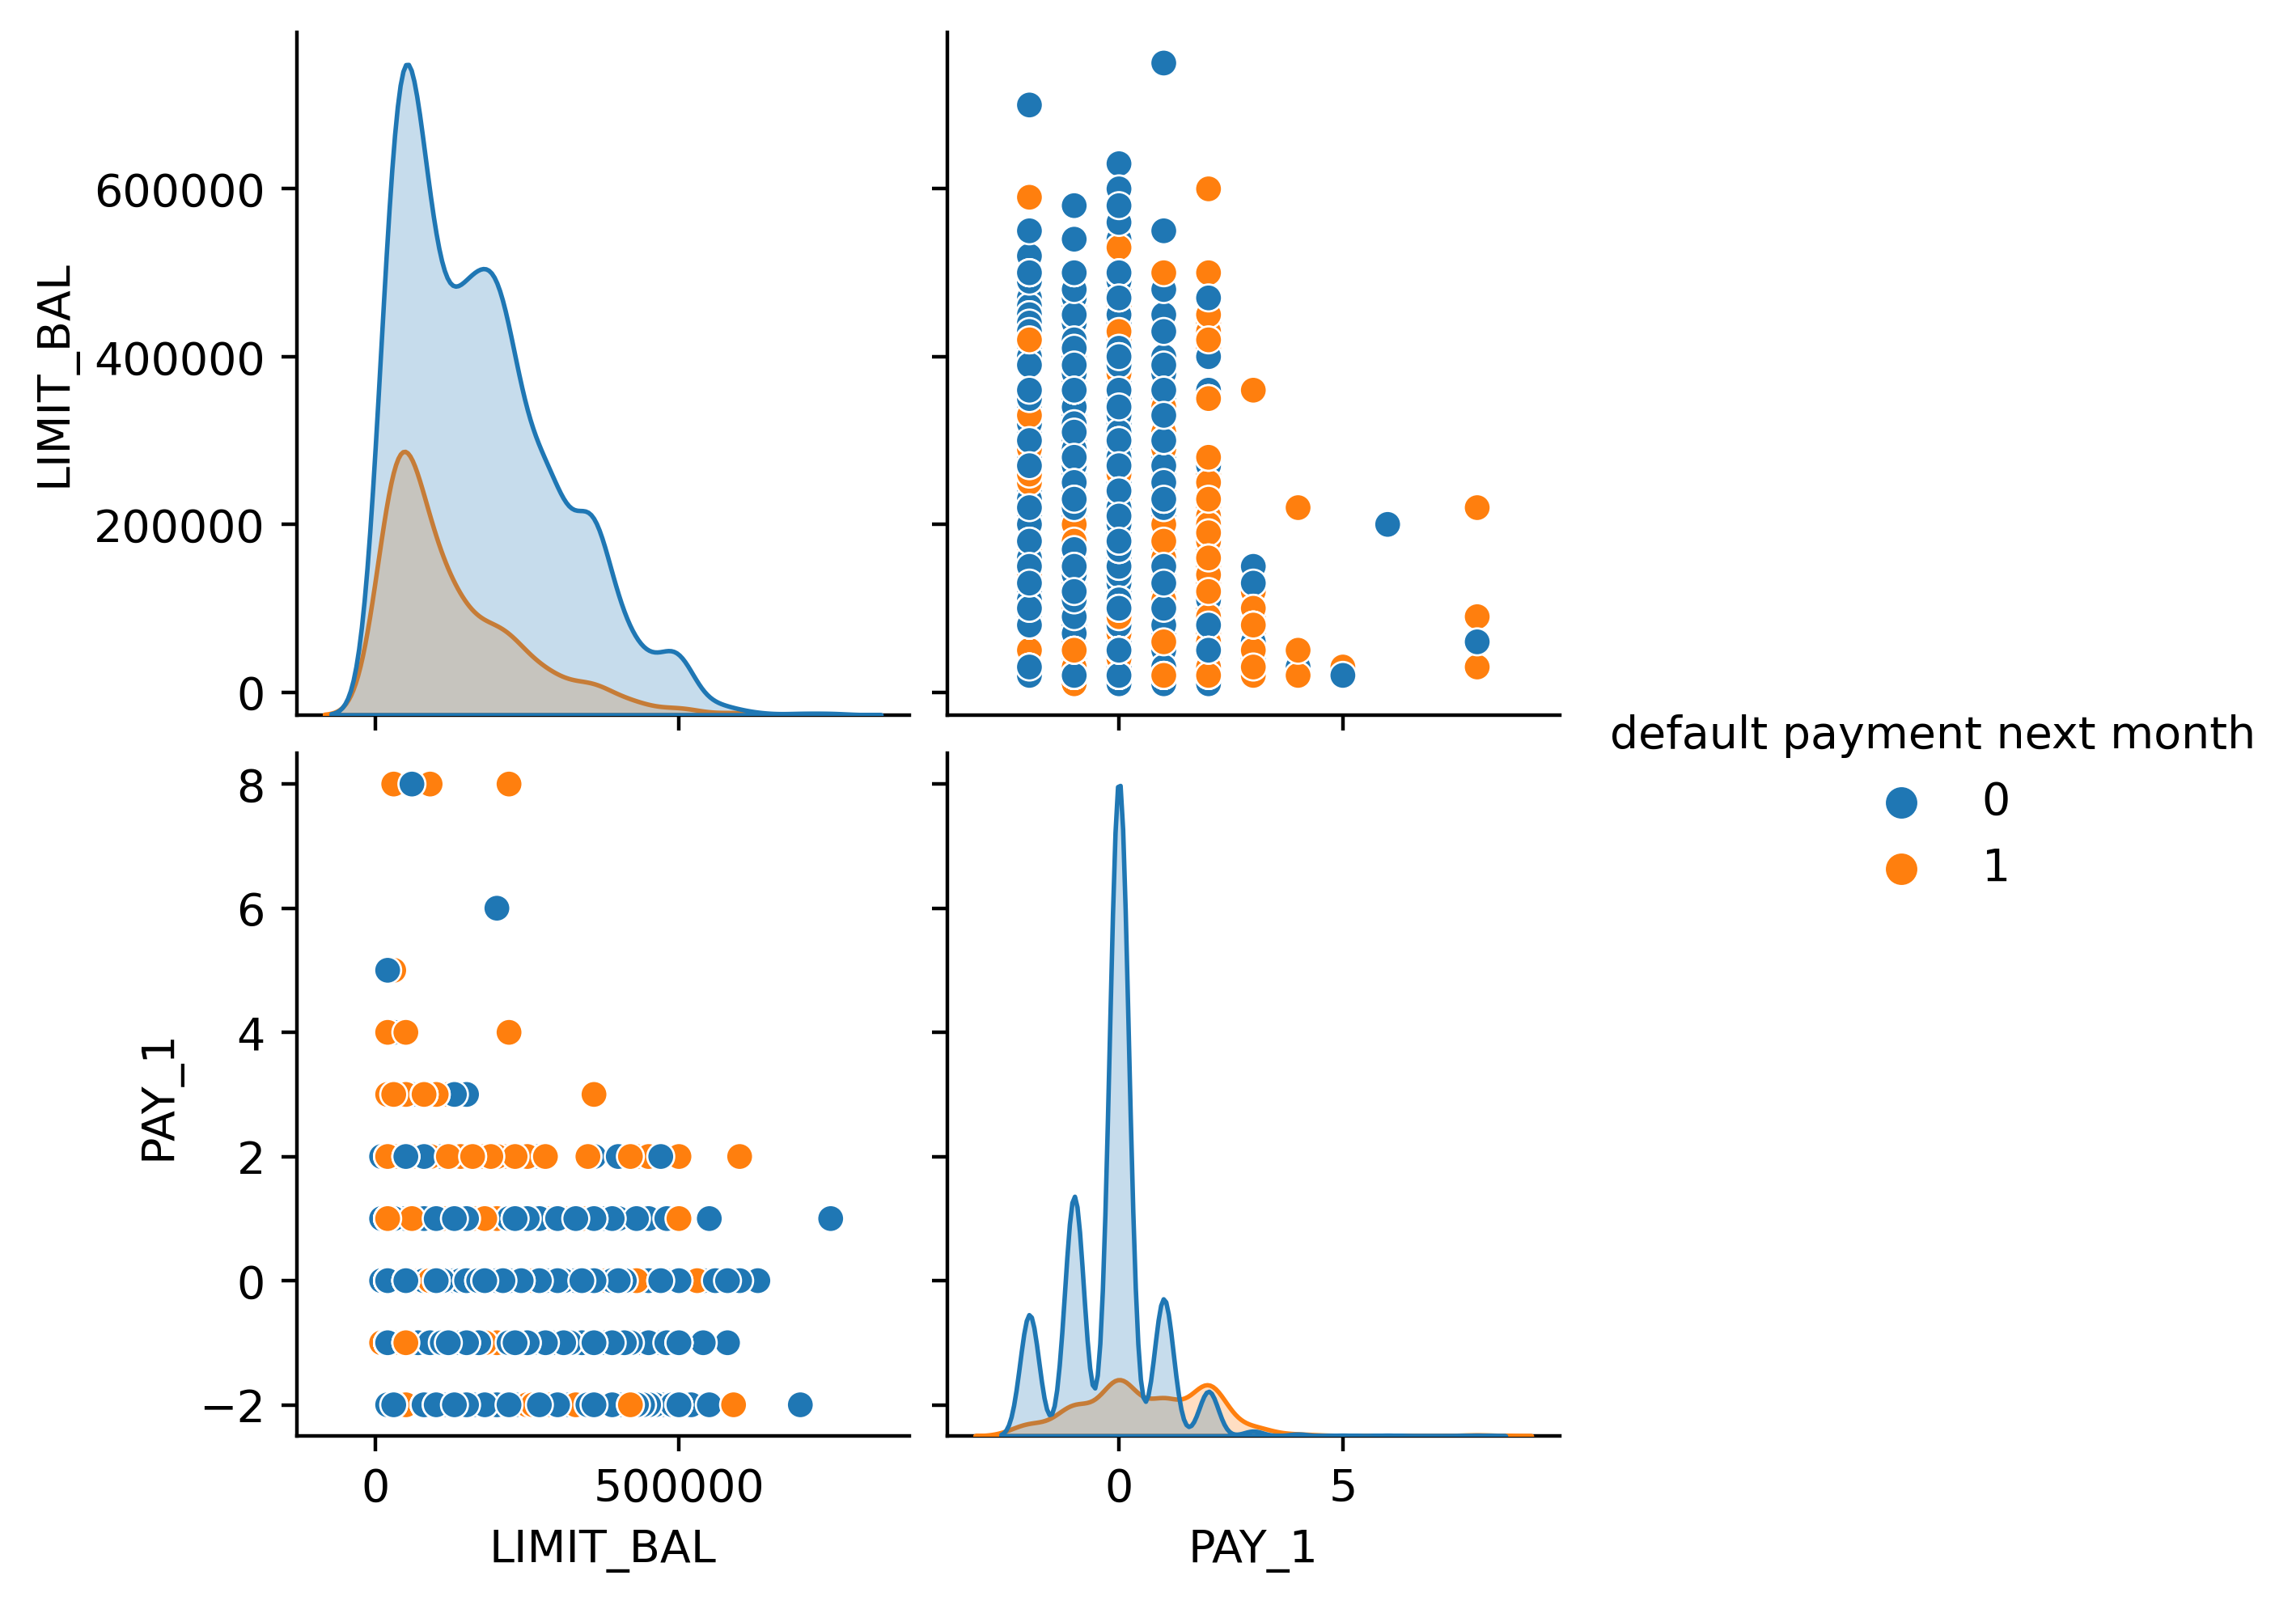

In [13]:
sns.pairplot(df_sample, hue='default payment next month')

f_tests and univariate feature selection

In [22]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [23]:
#THERE ARE 17 FEATURES AND BOTH FEATURES AND RESPONSE ARRAYS HAVE SAME NUMBER OF SAMPLES AS EXPECTED
from sklearn.feature_selection import f_classif

In [24]:
[f_stat, f_p_value]=f_classif(X, y)

In [25]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [26]:
#for every decrease in pvalue theres an increase in f_stats
#this shows that the f test corresponds to persons correlation as pay_1 and lim bal still have highest values

In [27]:
#TOP 20% PERCENTILE
from sklearn.feature_selection import SelectPercentile

In [28]:
selector = SelectPercentile(f_classif, percentile = 20)
selector.fit(X,y)

SelectPercentile(percentile=20)

In [29]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [30]:
features = features_response[:-1]

In [31]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]

In [32]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [33]:
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


VISUALIZING THE RELATIONSHIP BETWEEN FEATURES AND RESPONSE

In [34]:
#CALCULATE A BASELINE FOR THE RESPONSE VARIABLE OF THE DEFAULT RATE ACCROSS THE WHOLE DATASET.
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [35]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\394810323.py:2: FutureWarning: The provided callable <function mean at 0x0000027662F563E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})


,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


<Figure size 2400x1600 with 0 Axes>

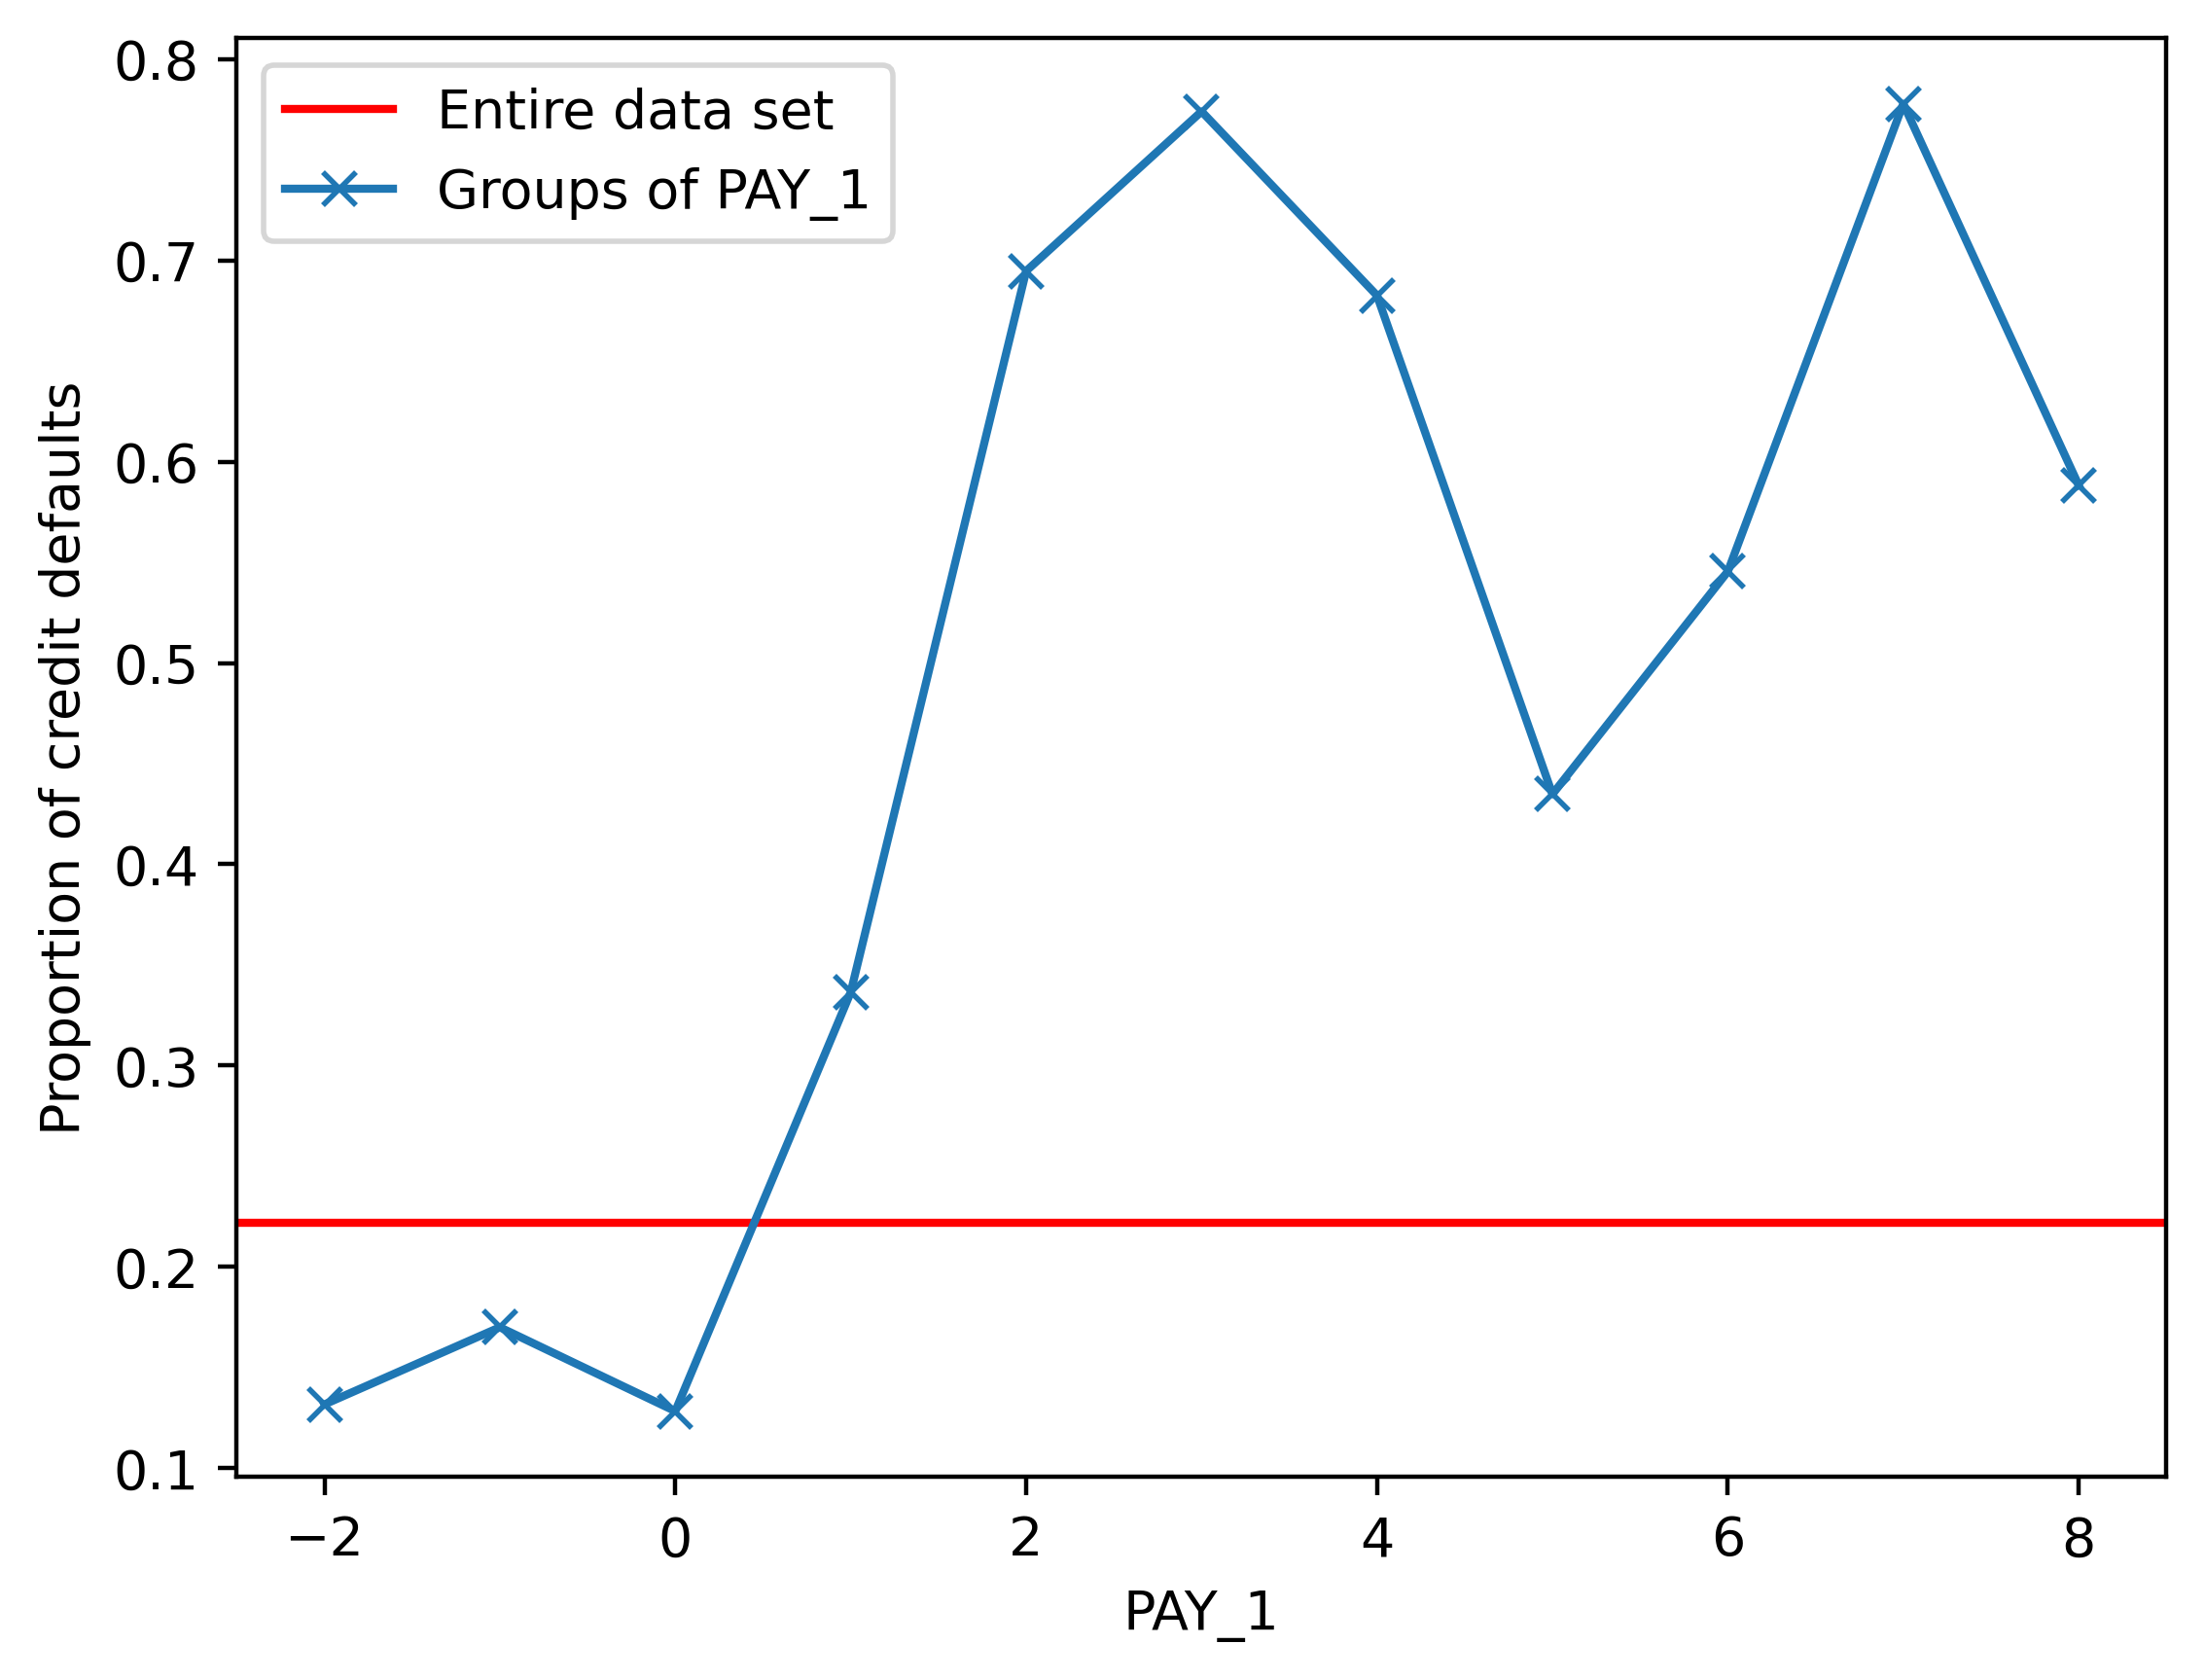

<Figure size 2400x1600 with 0 Axes>

In [36]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Groups of PAY_1'])
plt.figure(figsize=(6, 4))


In [37]:
#this is an informatiuve plot as it shows that those who defaulted before are the most likely to default again
pos_mask = y == 1 
neg_mask = y == 0


Text(0.5, 1.0, 'Credit limits by response variable')

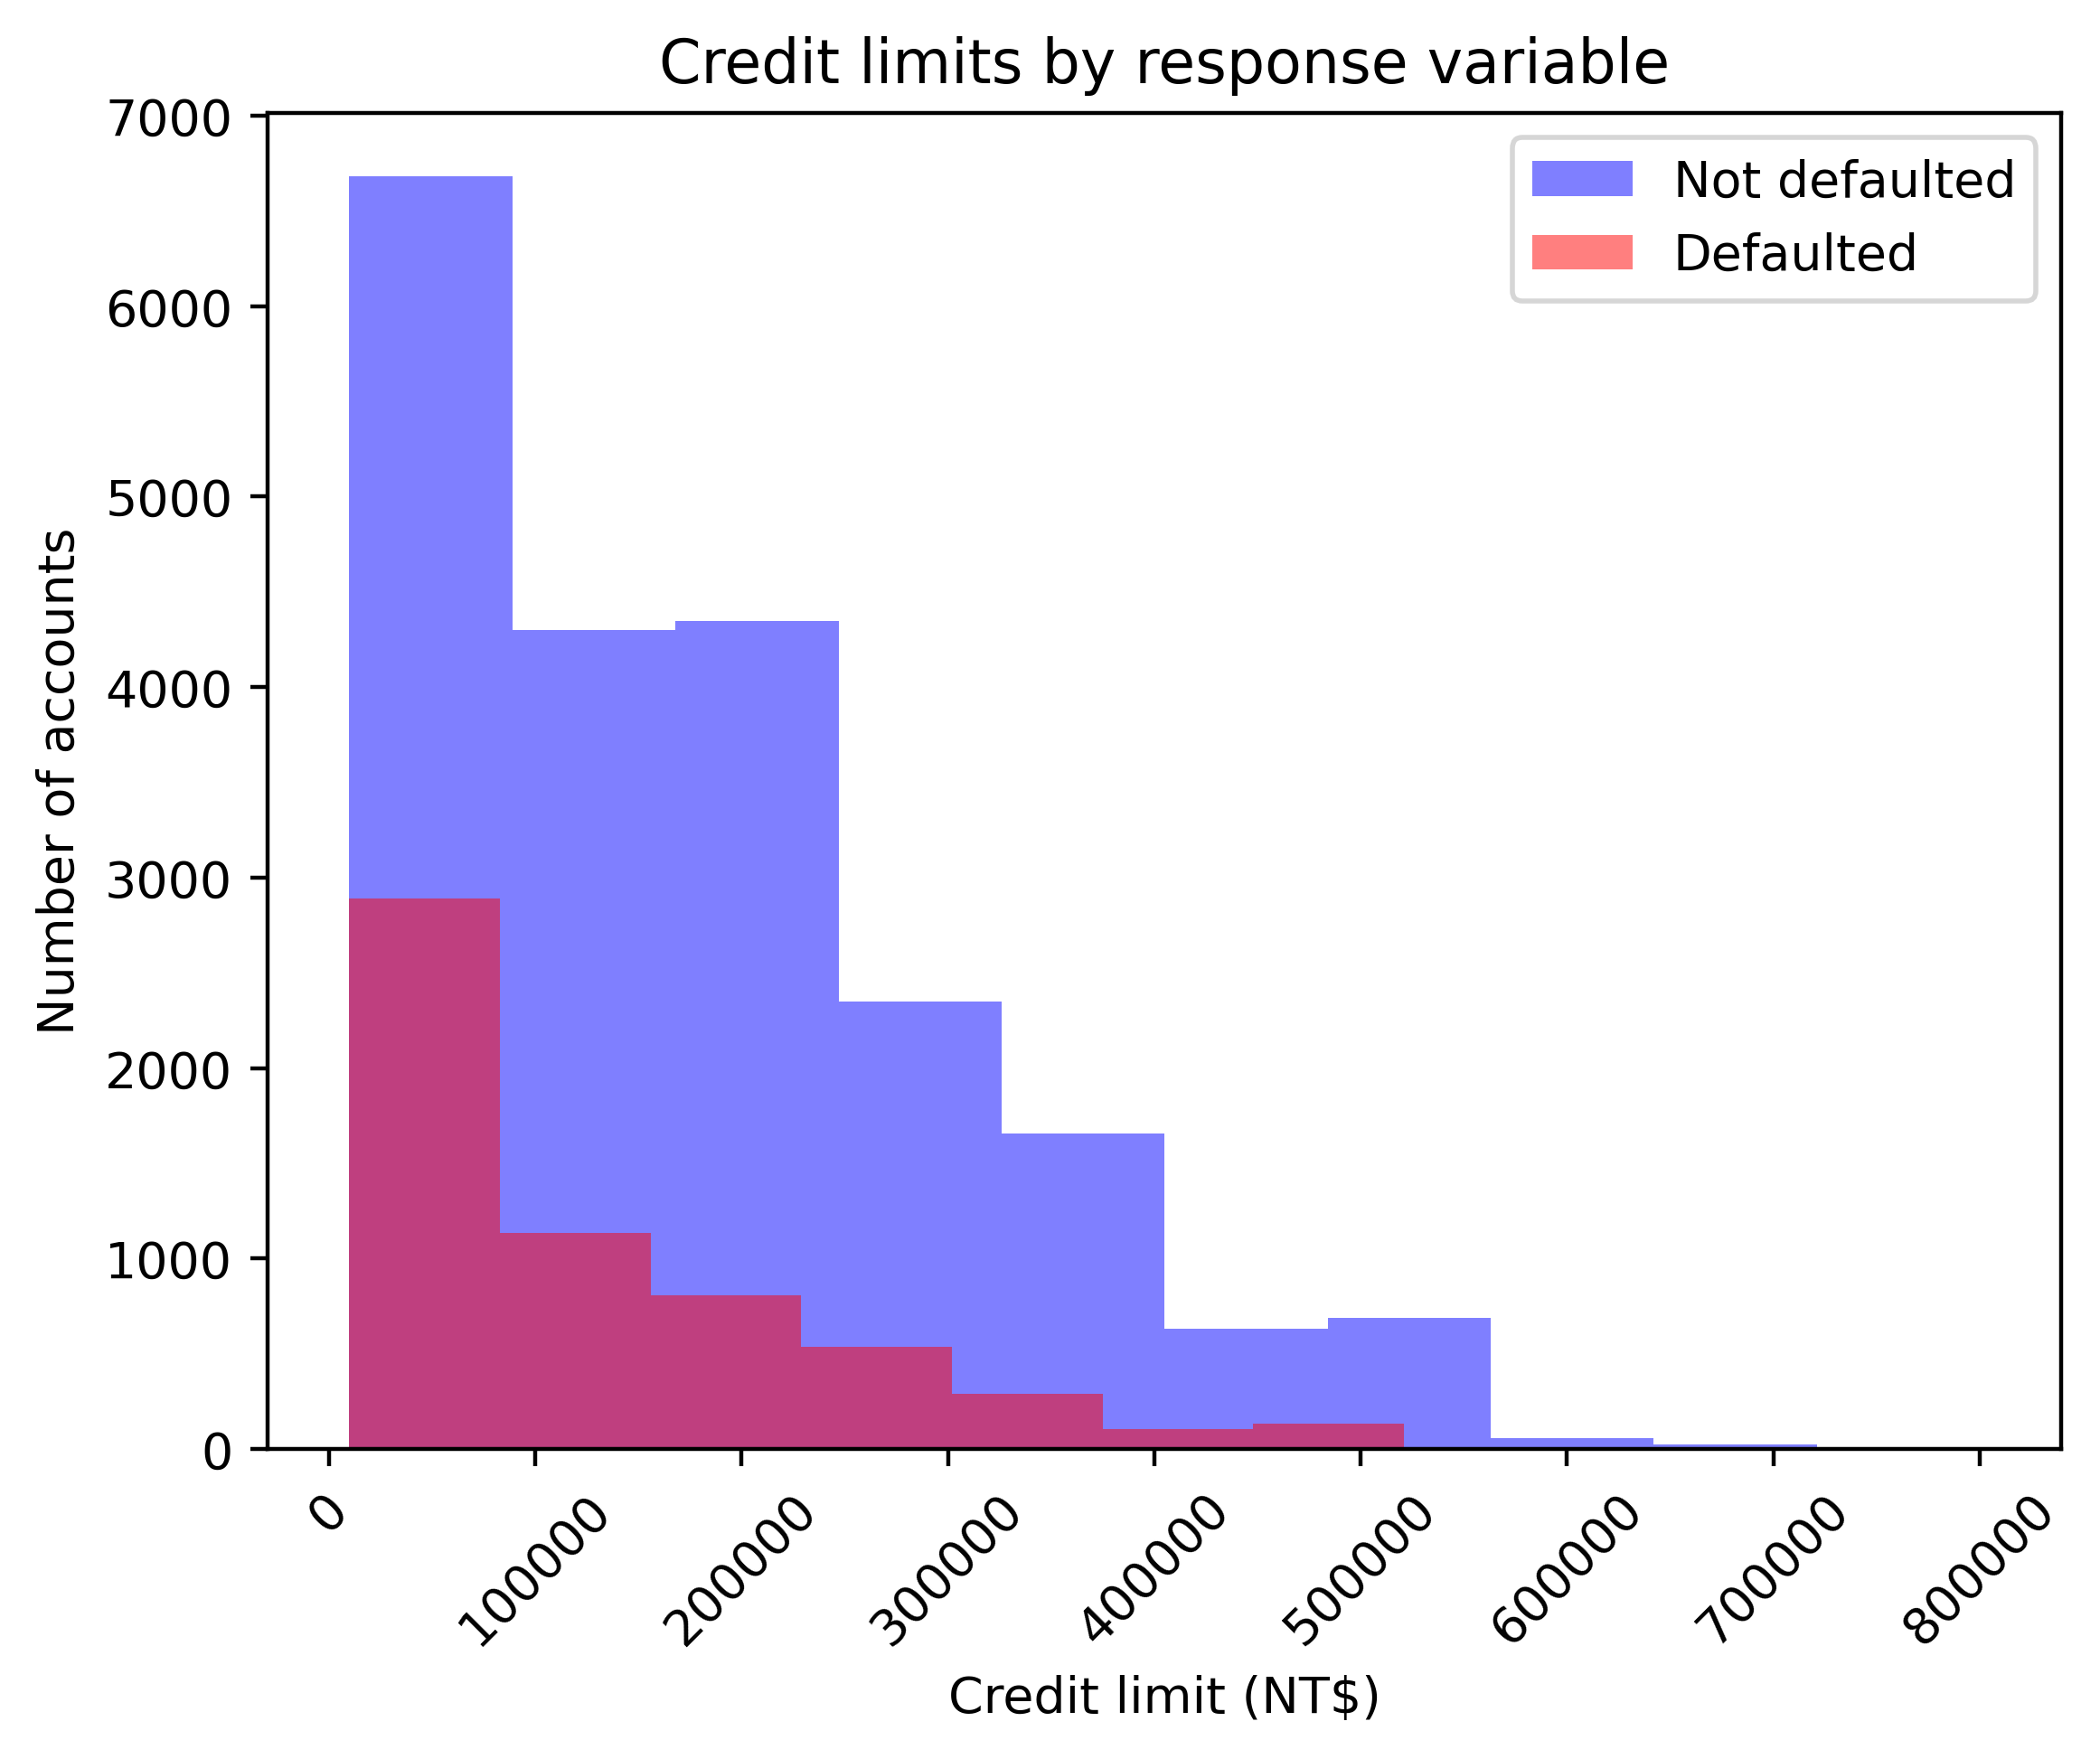

In [38]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [39]:
df['LIMIT_BAL'].max()

800000

In [40]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\1972270715.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

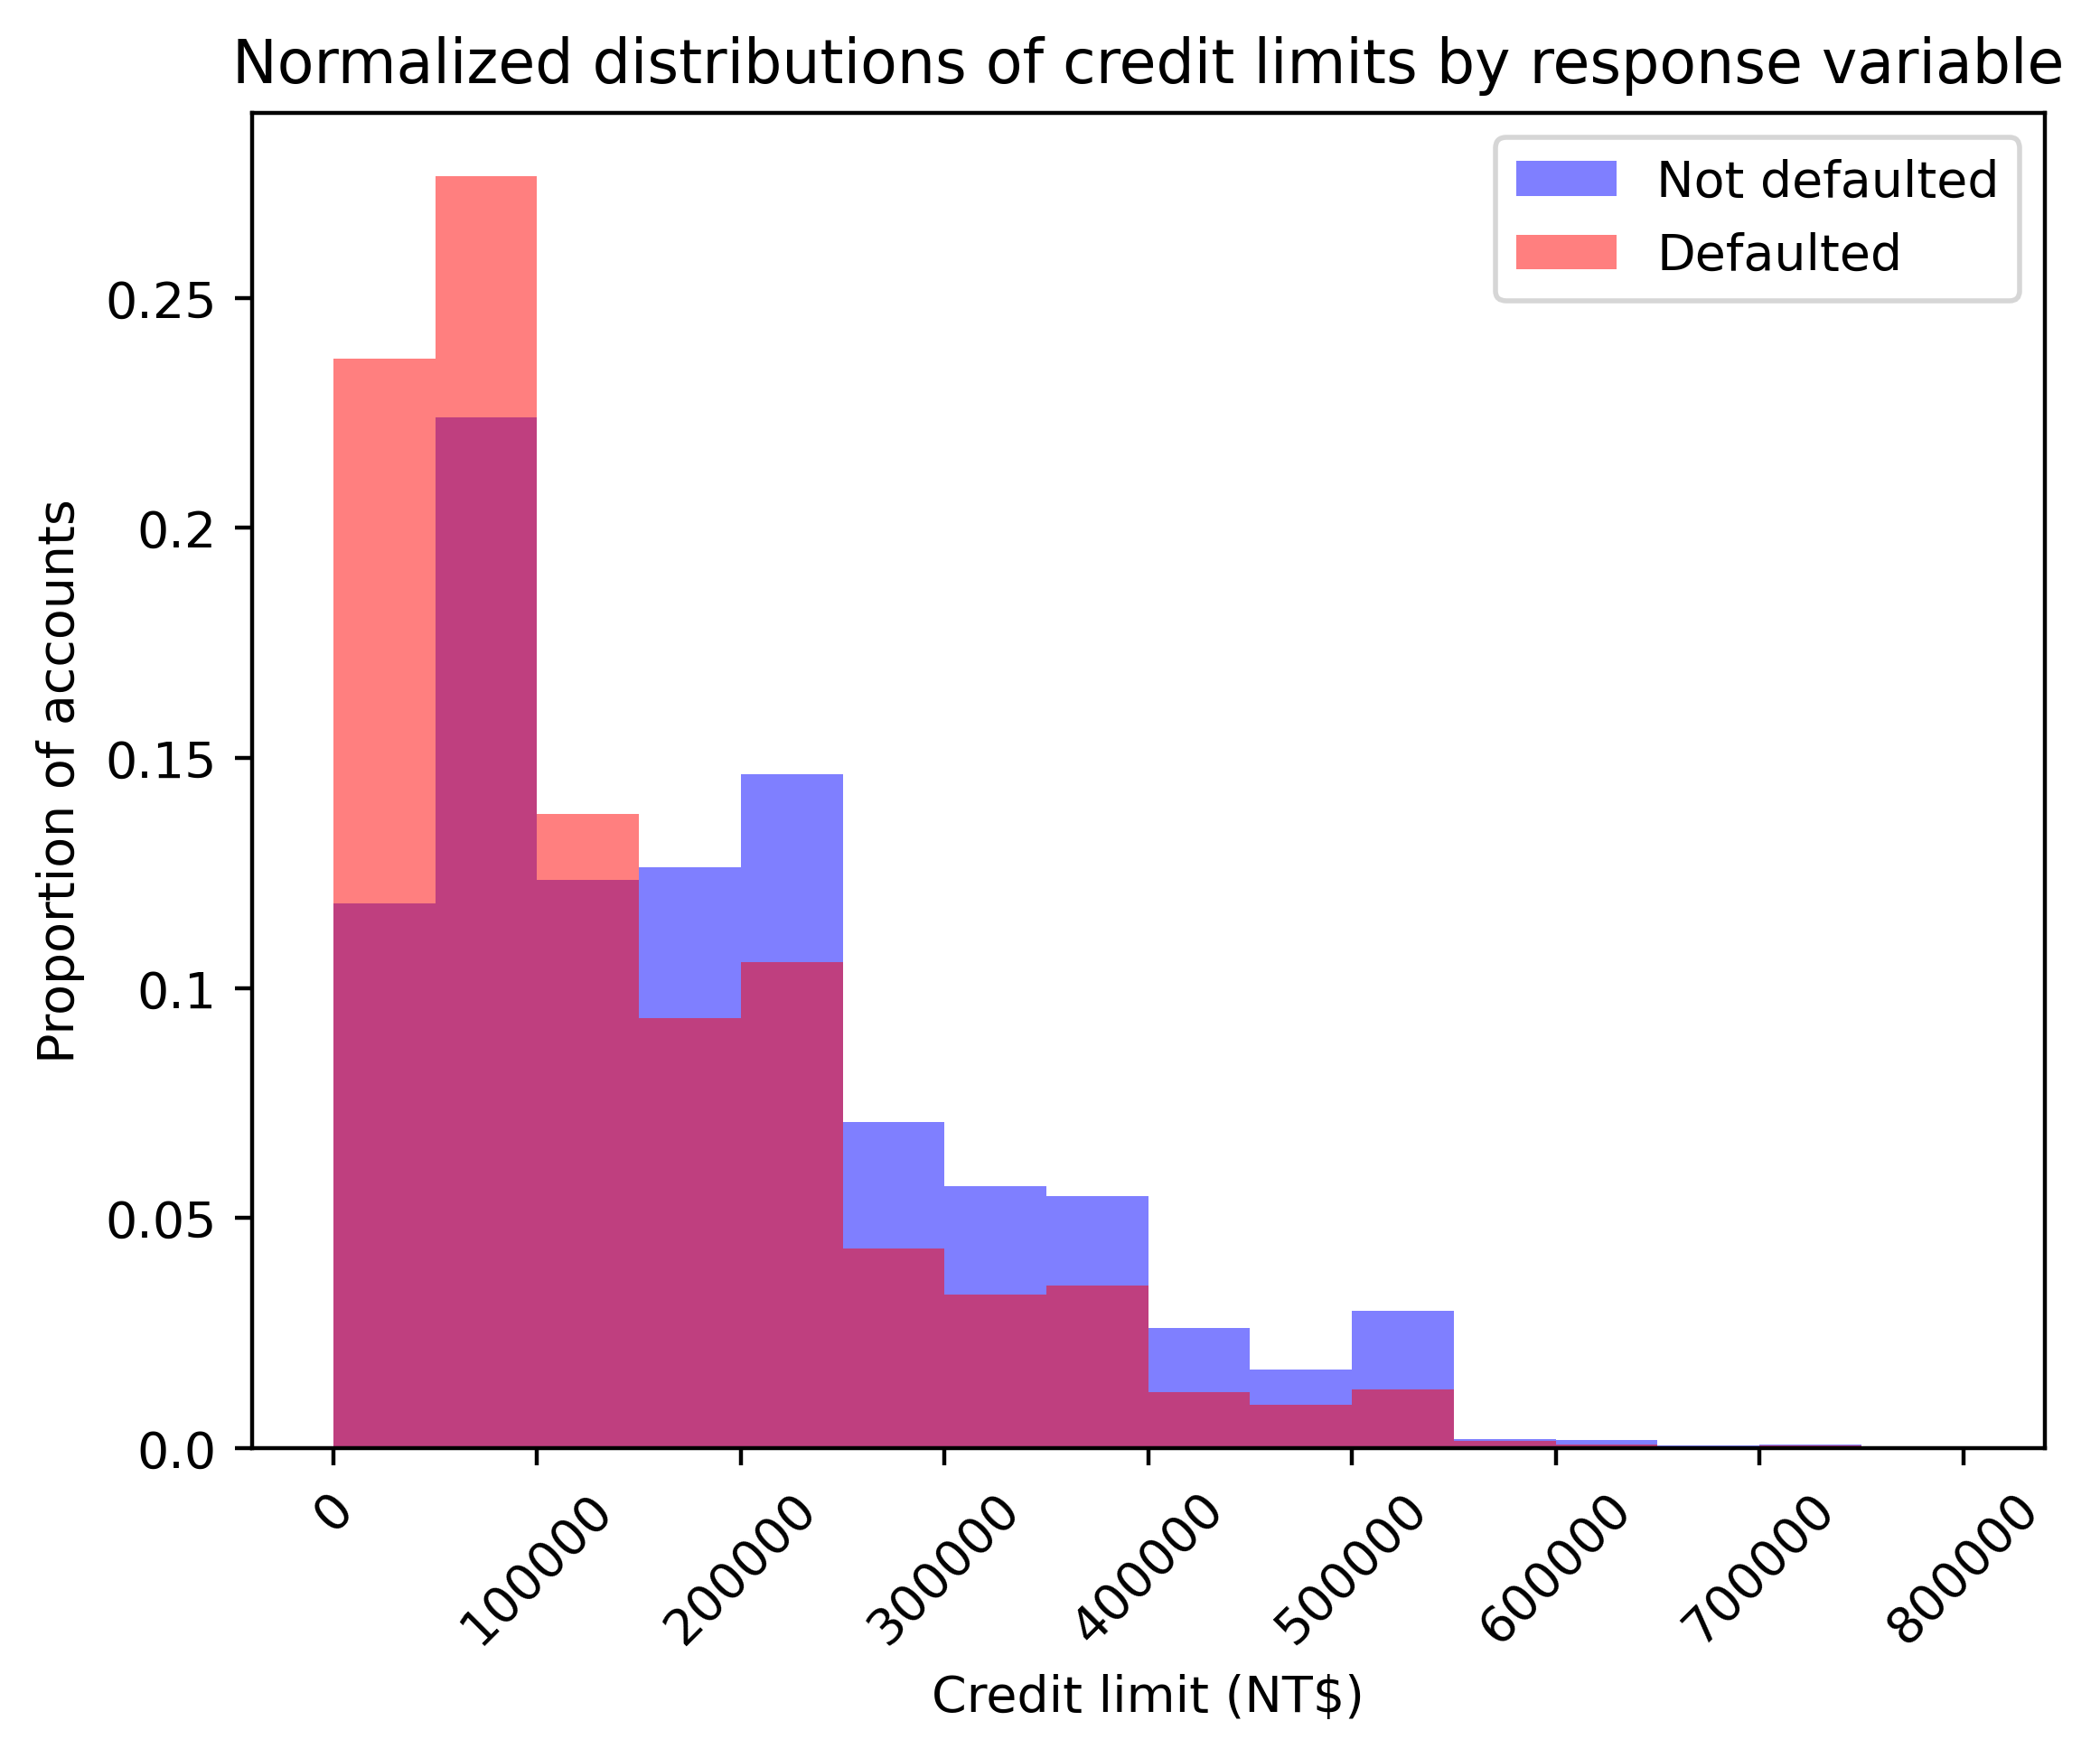

In [43]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

UNDERSTANDING LOGISTIC REGRESSION WITH FUNCTION SYNTAX IN PYTHON AND THE SIGMOID FUNCTION

In [47]:
#CONSIDER AN IMPORTANT MATHEMATICAL FUNCTION: SIGMOID OR LOGISTIC FUNCTION
#CREATE AN ARRAY OF NUMBERS USING NUMPYS LINSPACE
#INPUT 1, STARTING POINT, INPUT 2 END PONT, INPUT3 NUMBER OF VALUES YOU WANT
X_exp = np.linspace(-4, 4, 81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


Text(0.5, 1.0, 'plot of $e^X$')

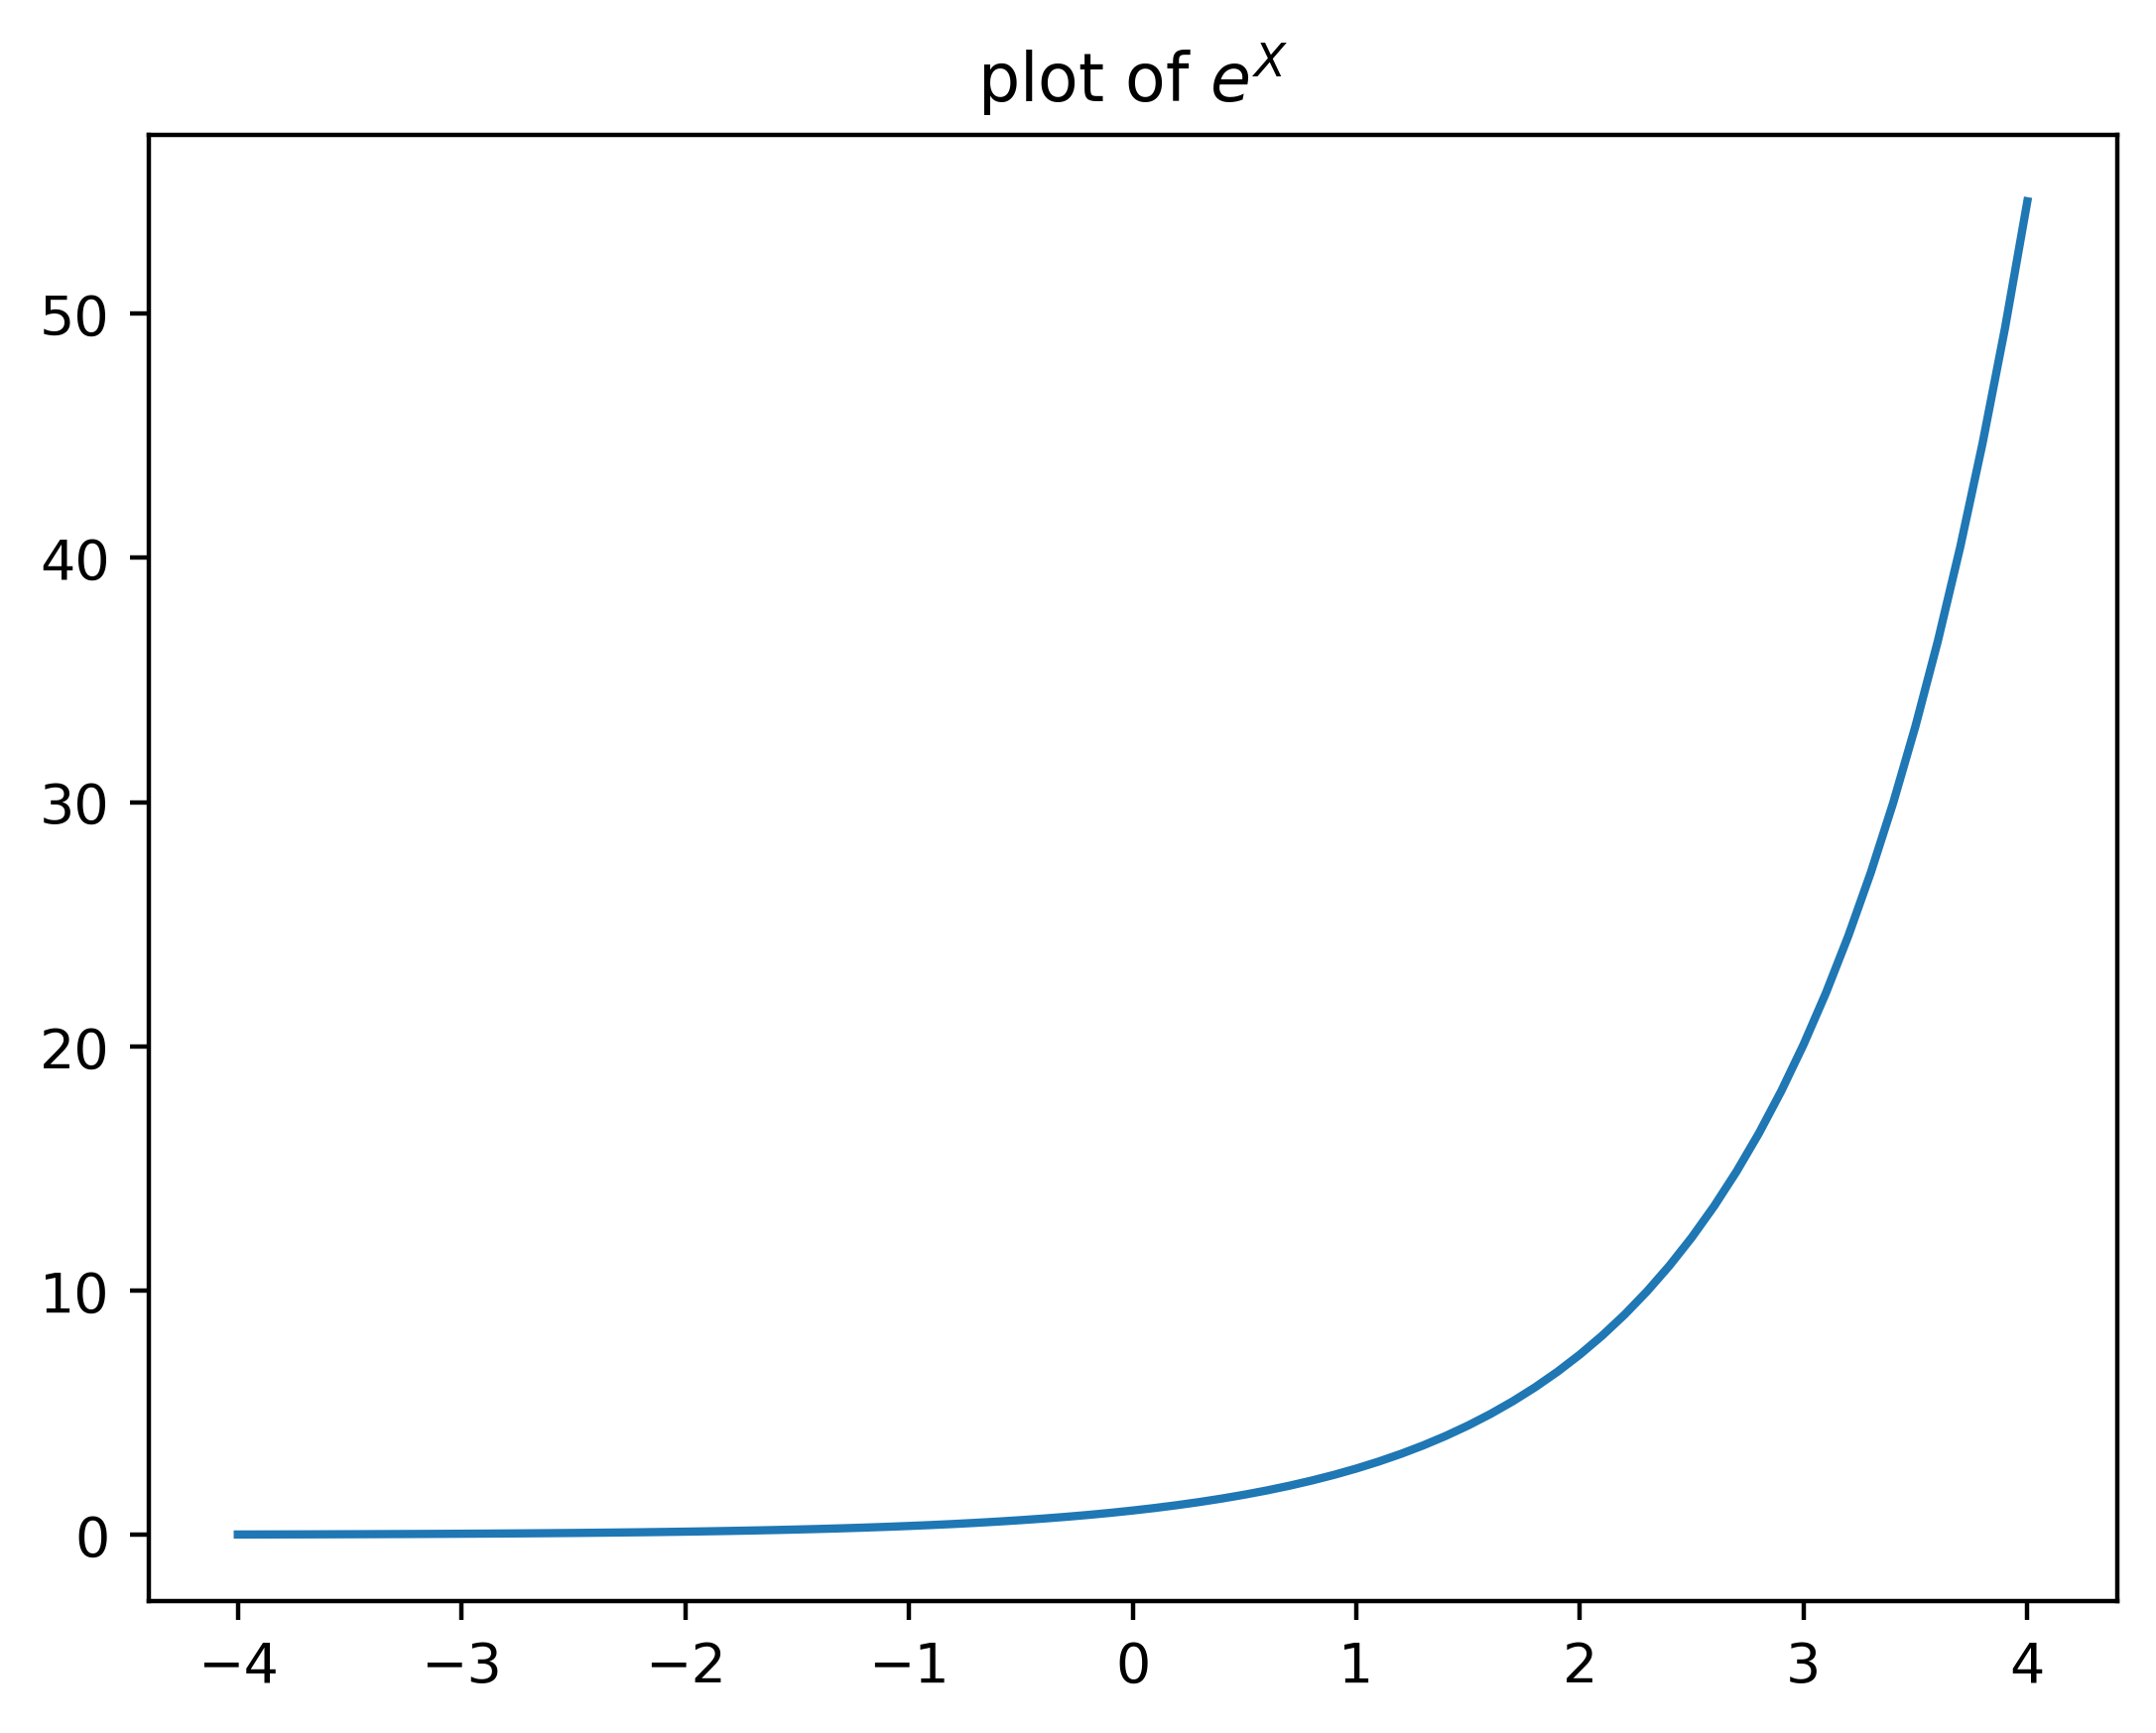

In [48]:
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp)
plt.title('plot of $e^X$')

In [49]:
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Text(0.5, 1.0, 'Plot of $e^{-X}$')

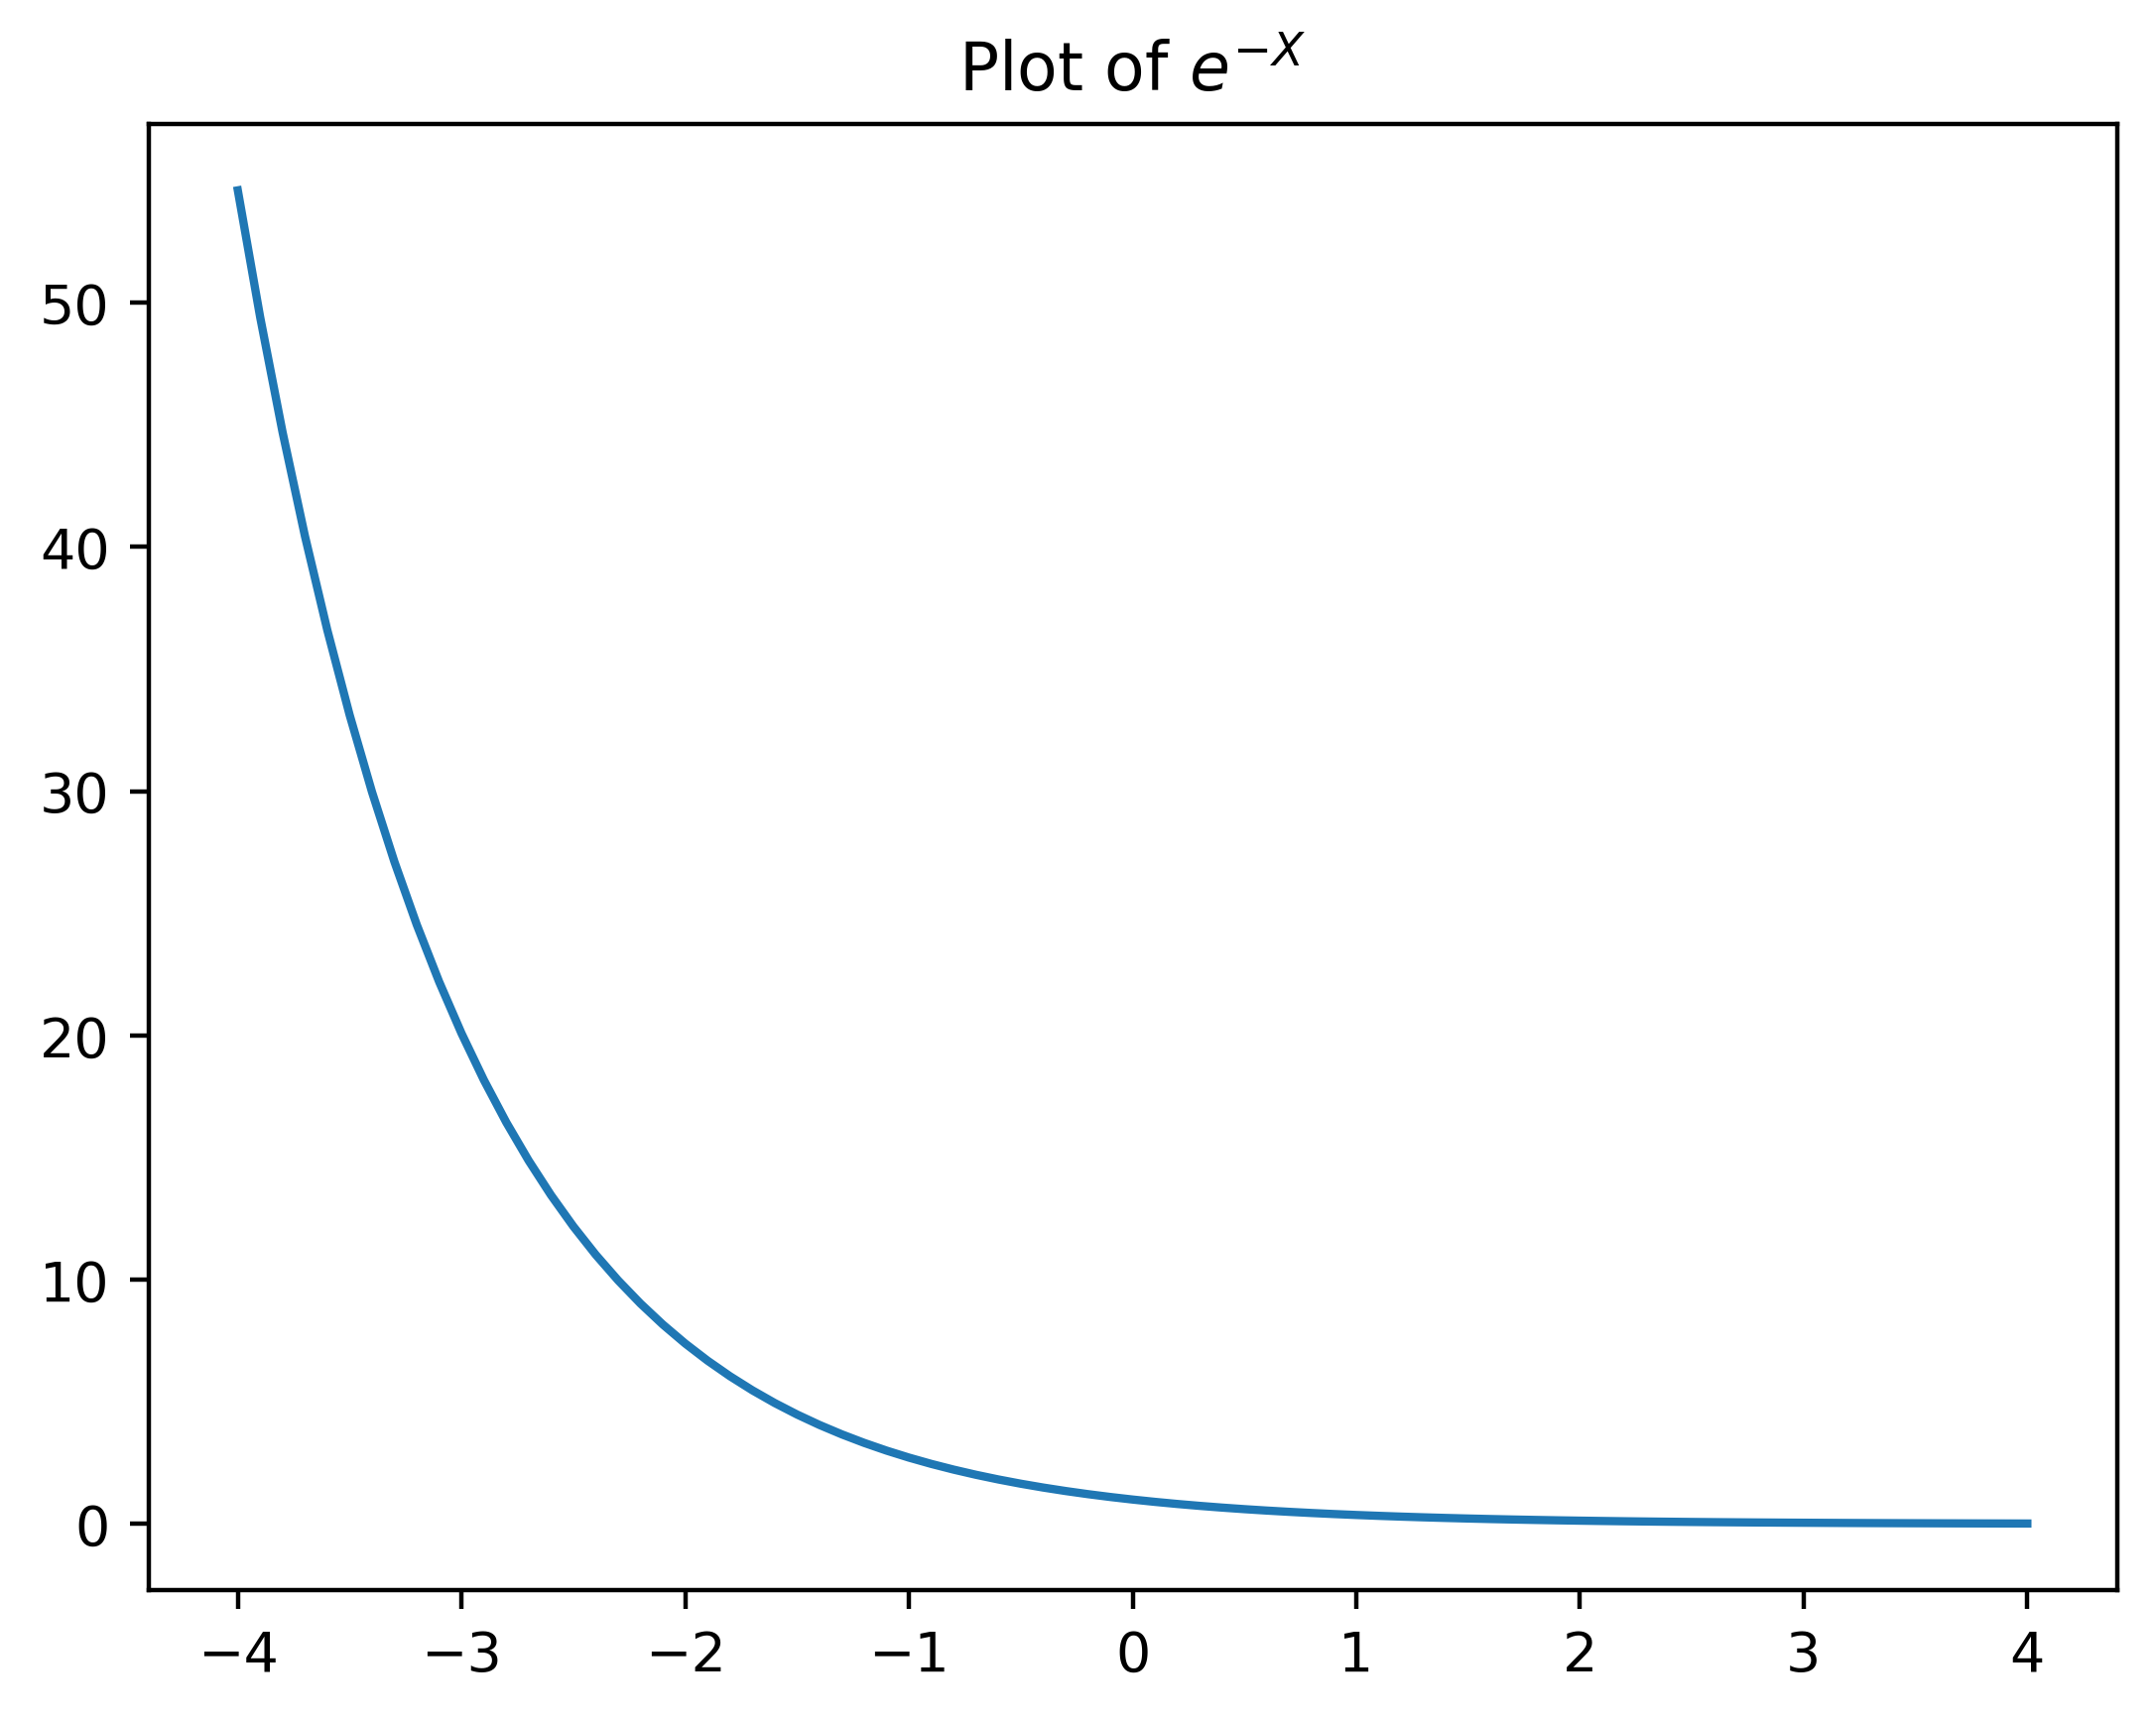

In [50]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [54]:
def sigmoid(x):
    Y = 1/(1 + np.exp(-x))
    return Y

Text(0.5, 1.0, 'our sigmoid function')

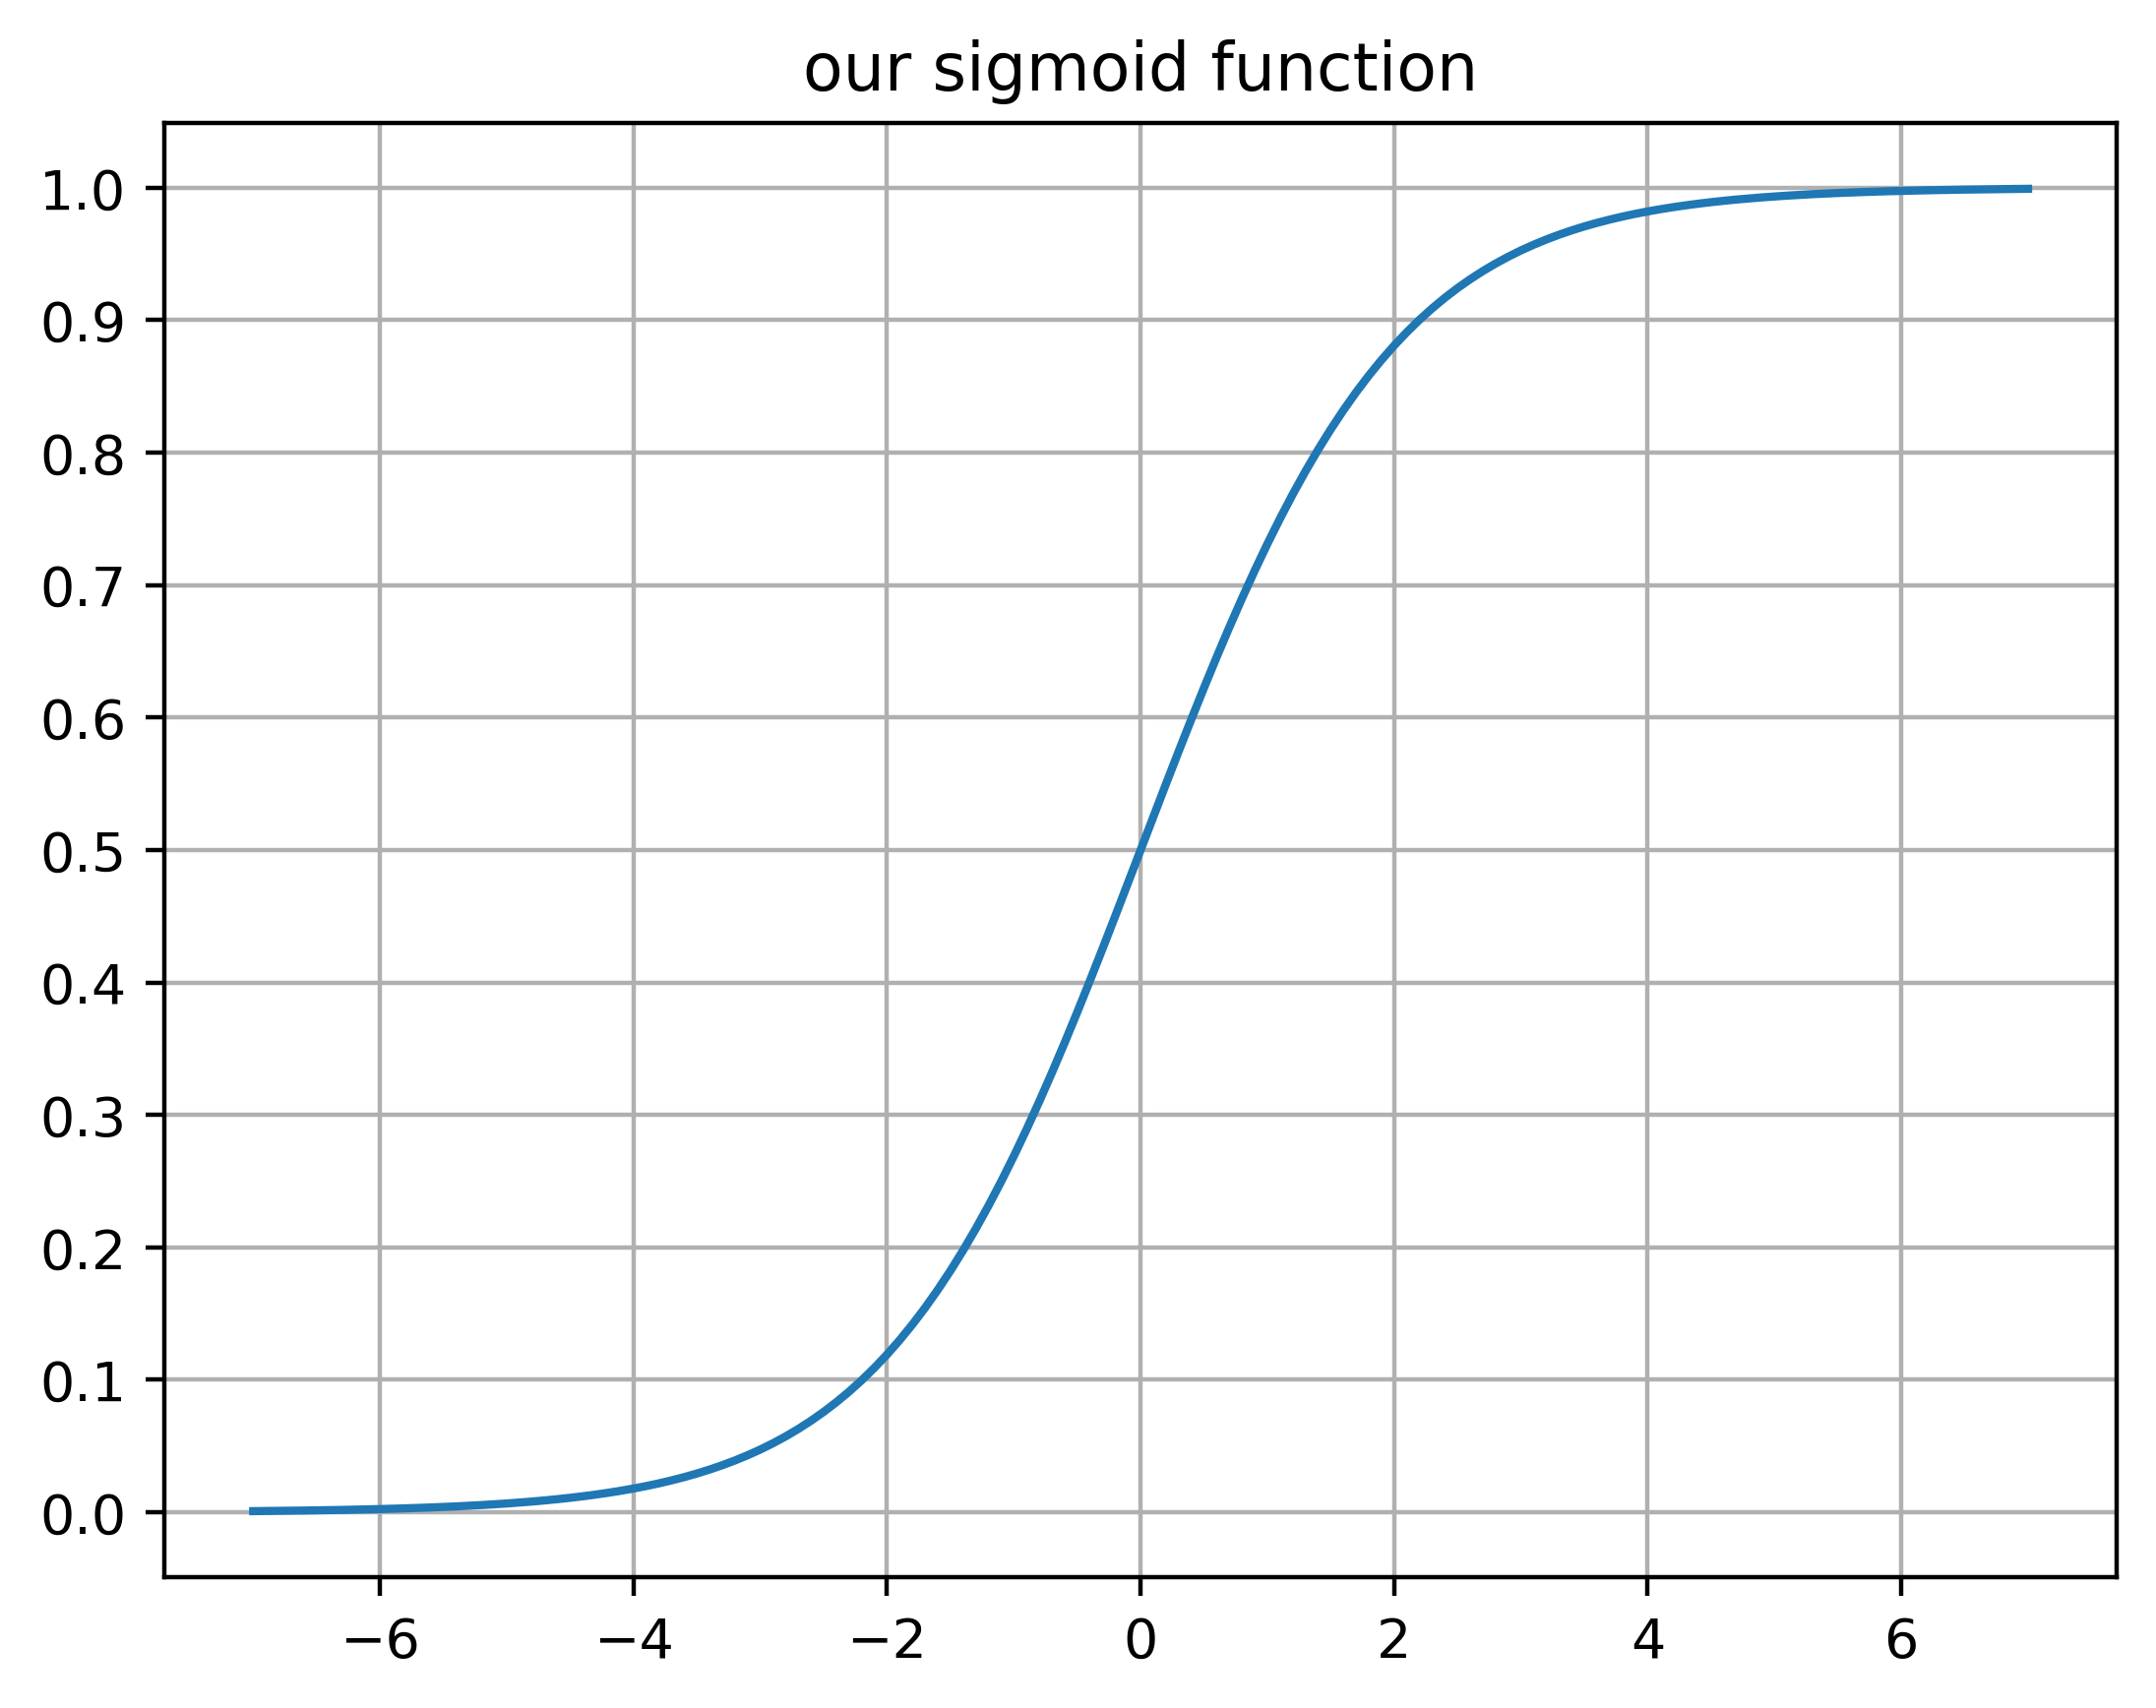

In [56]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title("sigmoid function")

In [59]:
#expected; the sigmoid(0) is 0.5
#evaluate the appropriateness of lead feature for logistic regression

In [58]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


extract the mean values from these groups and store them in a variable p

In [64]:
p = group_by_pay_mean_y['default payment next month'].values #probability of defaulting

In [65]:
#q = 1-p
q = 1- p
print (p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [67]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [68]:
group_by_pay_mean_y.index

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'values of pay')

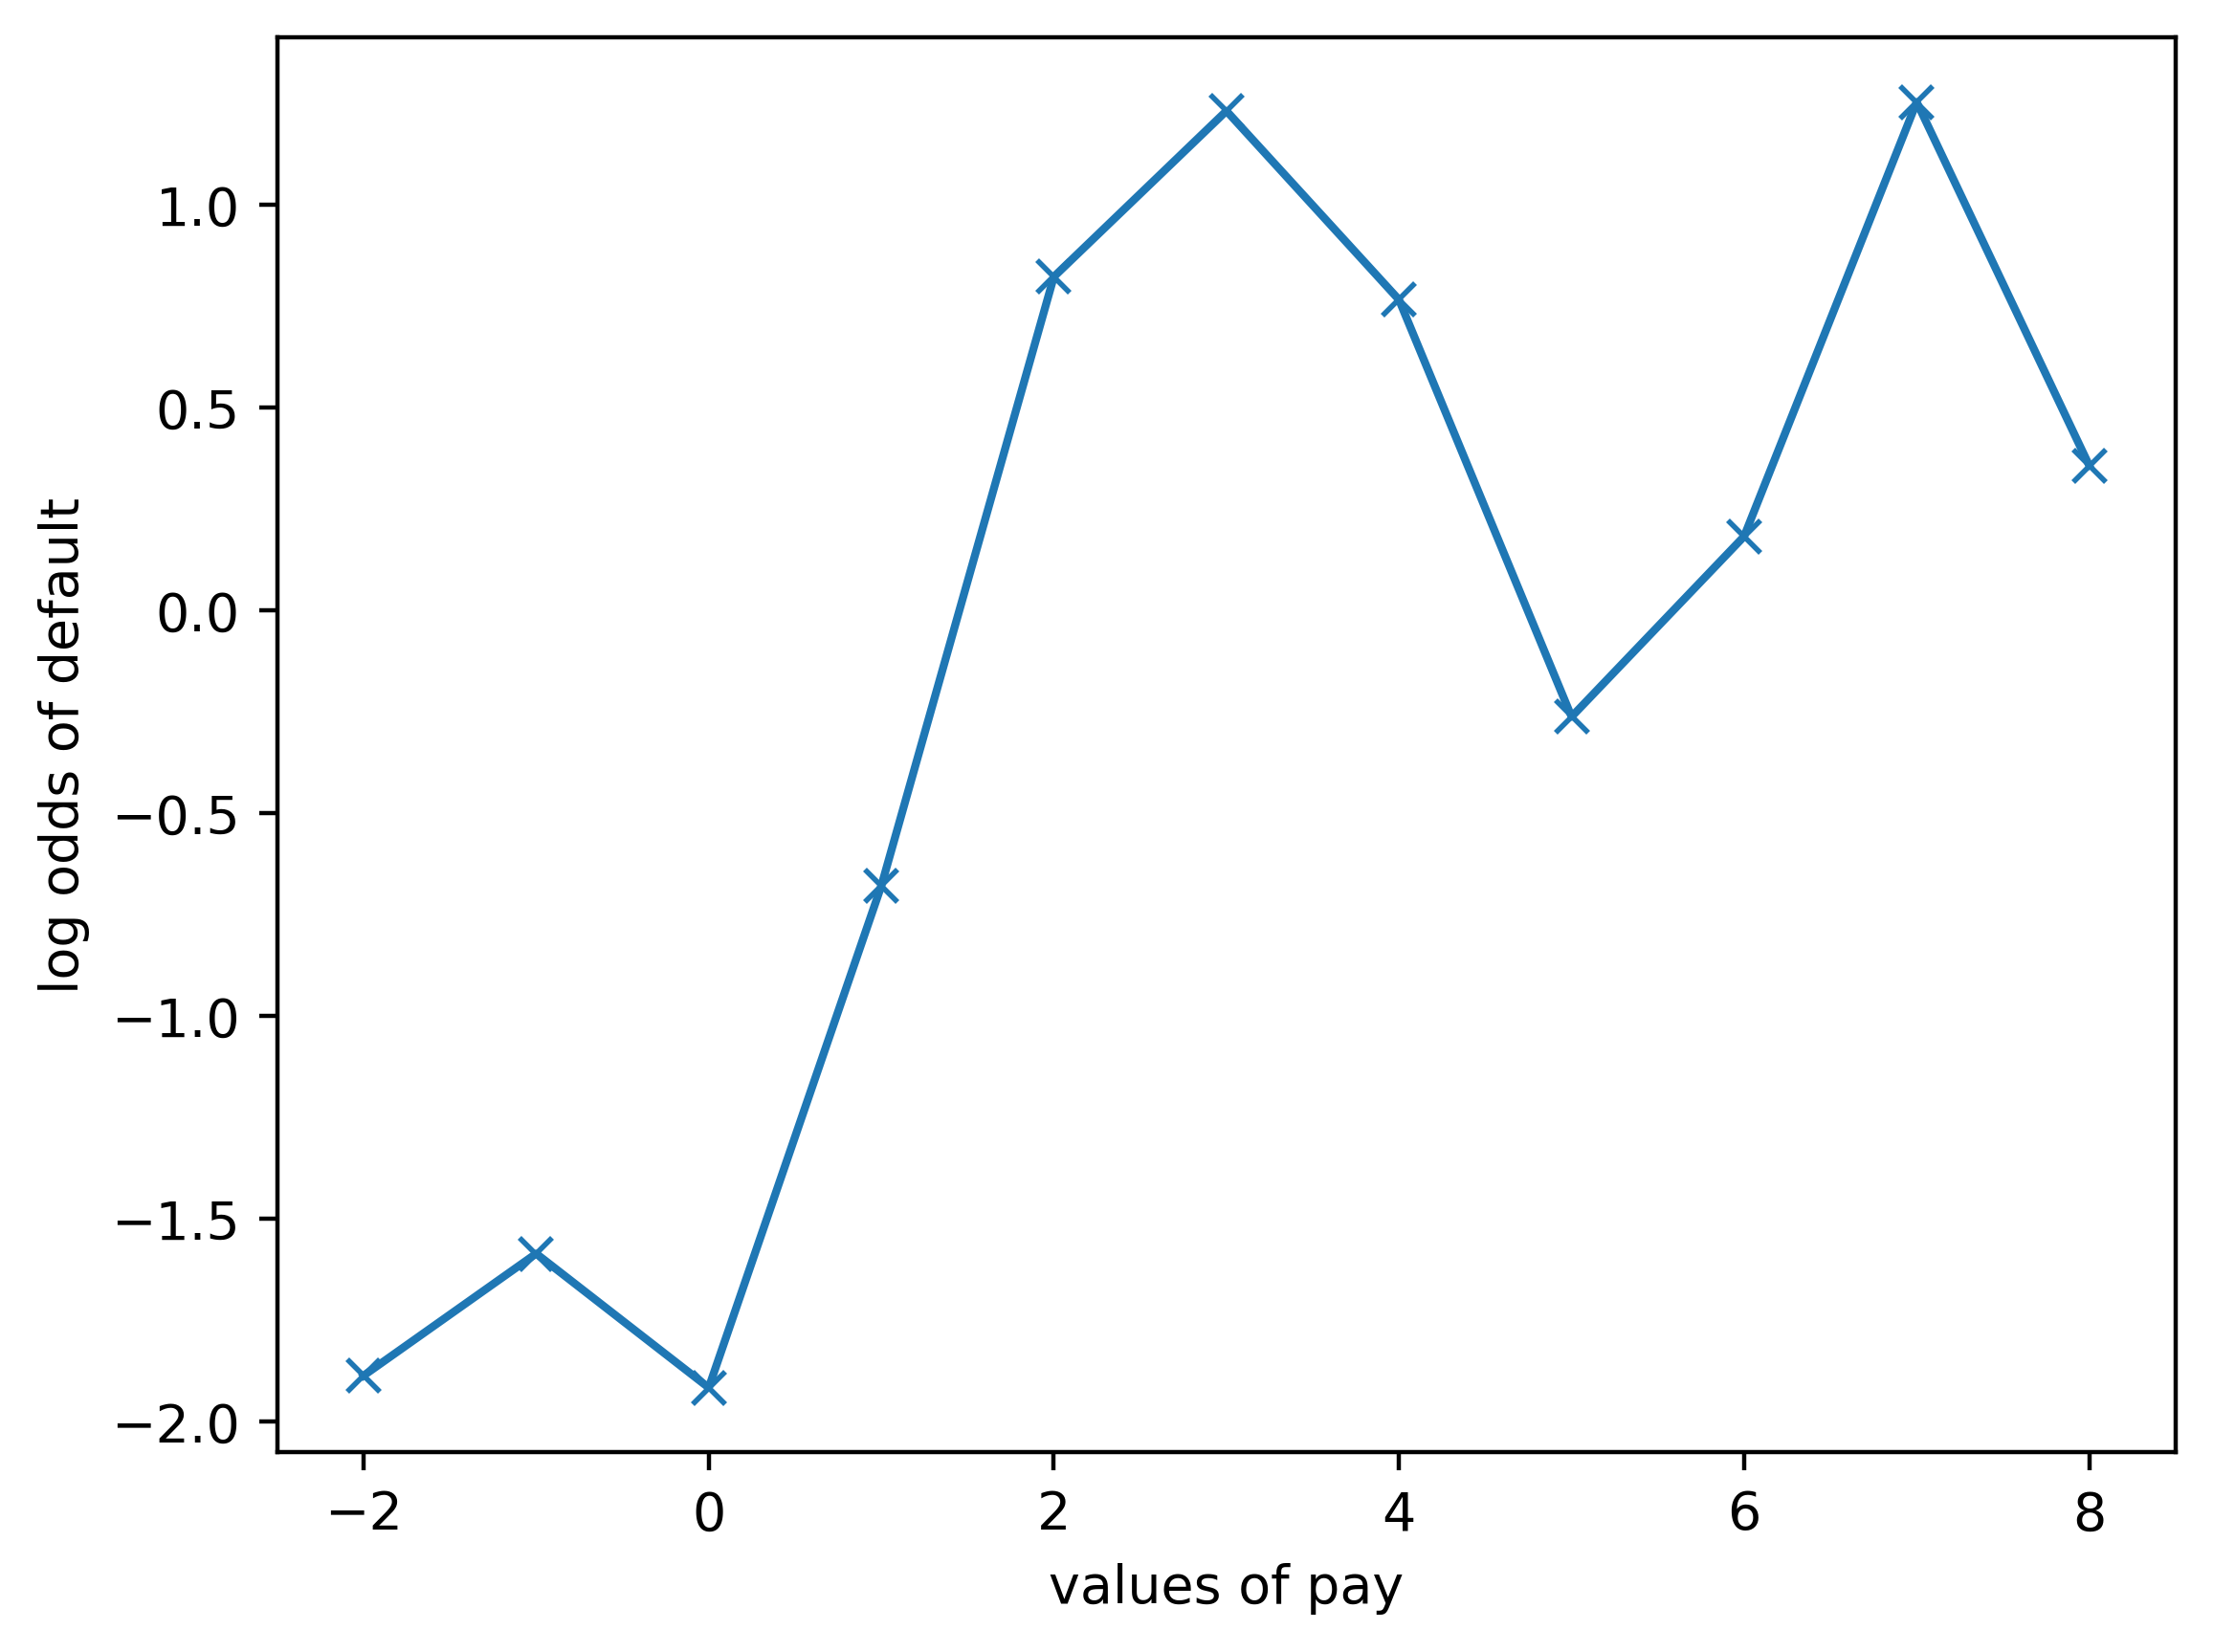

In [73]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('log odds of default')
plt.xlabel('values of pay')

LINEAR DECISION BOUNDARY OF LOGISTIC REGRESSION

In [74]:
#CONCEPT OF A DECISION BOUNDARY FOR A BINARY CLASSIFICATION PROBLEM.
#GENERATE TWO FEATURES X1 AND X2
np.random.seed(seed=6)
X_1_pos = np.random.uniform( low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform( low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform( low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = np.random.uniform( low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


Text(0, 0.5, '$x_2$')

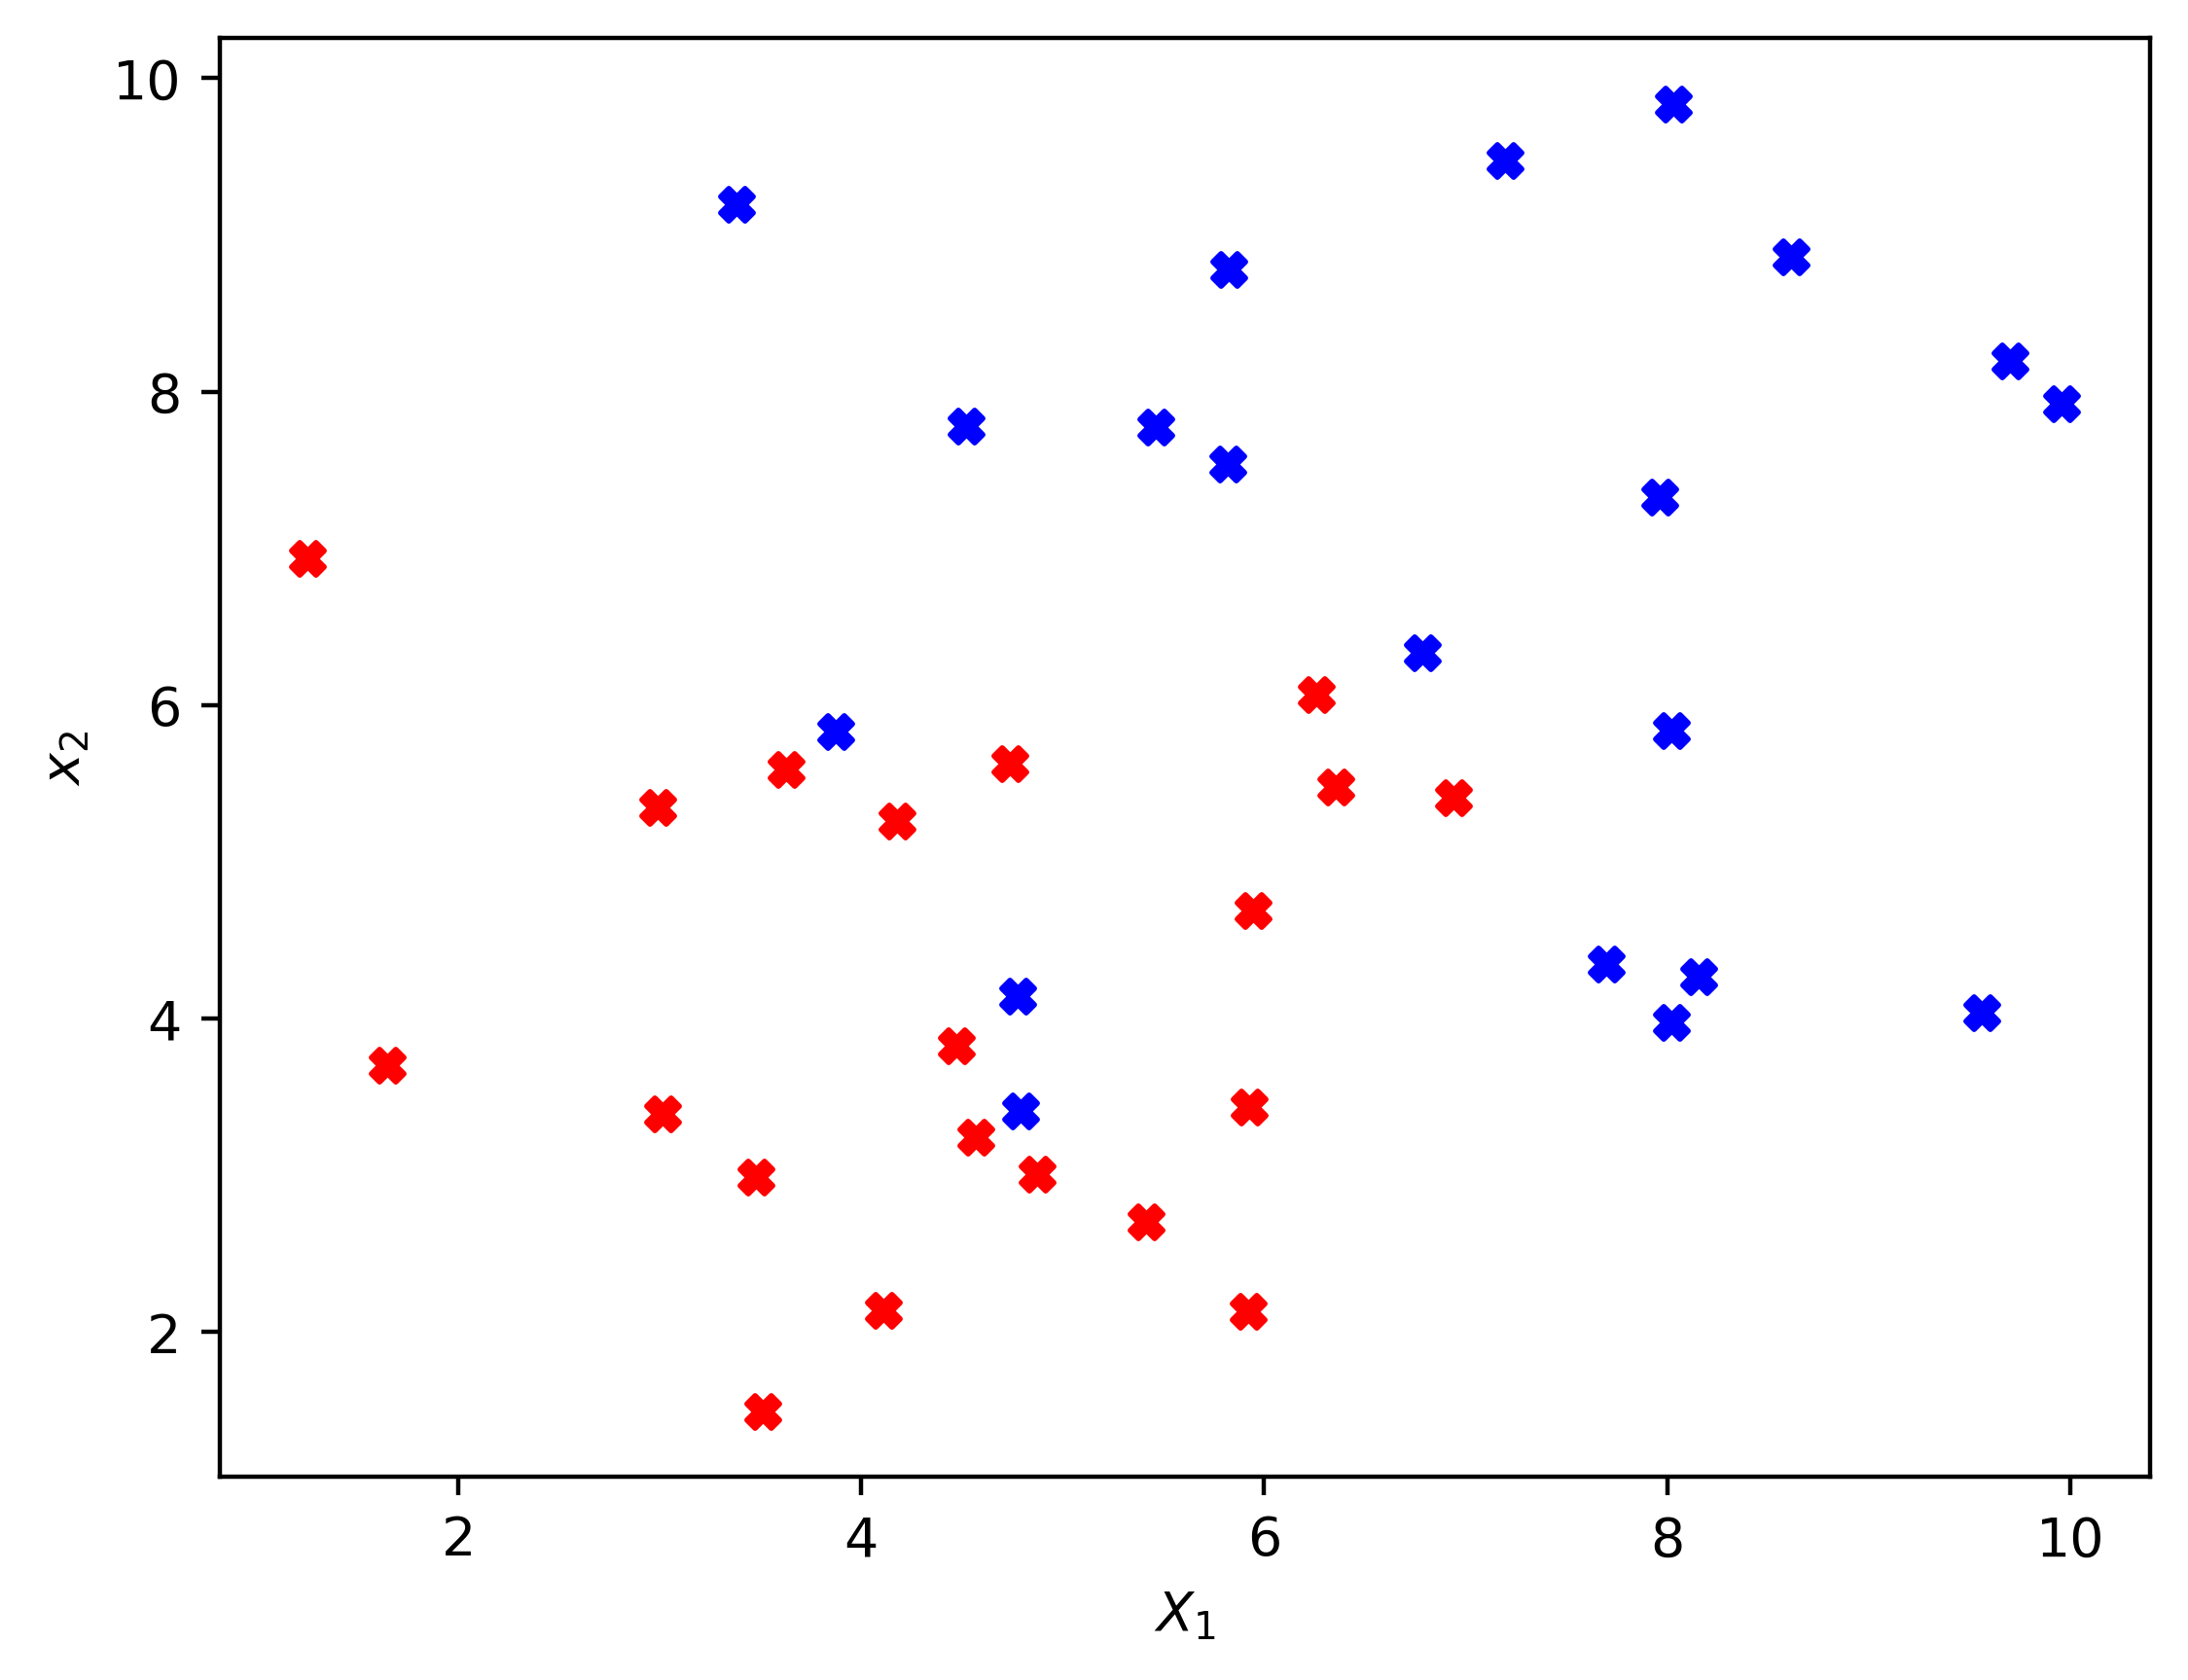

In [77]:
plt.scatter(X_1_pos, X_2_pos, color='red',marker= 'X')
plt.scatter(X_1_neg, X_2_neg, color='blue',marker= 'X')
plt.xlabel('$X_1$')
plt.ylabel('$x_2$')

In [79]:
X= np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [83]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [81]:
from sklearn.linear_model import LogisticRegression
example_lr= LogisticRegression(solver = 'liblinear')

In [82]:
example_lr

LogisticRegression(solver='liblinear')

In [84]:
example_lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [85]:
#get x predictions 
y_pred = example_lr.predict(X)

In [86]:
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]

In [87]:
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

COMPARE THE COLOR OF THE X SYMBOLS THE ACTUAL LABELS AGAINST THE O SYMBOLS THE PRDICTED LABELS

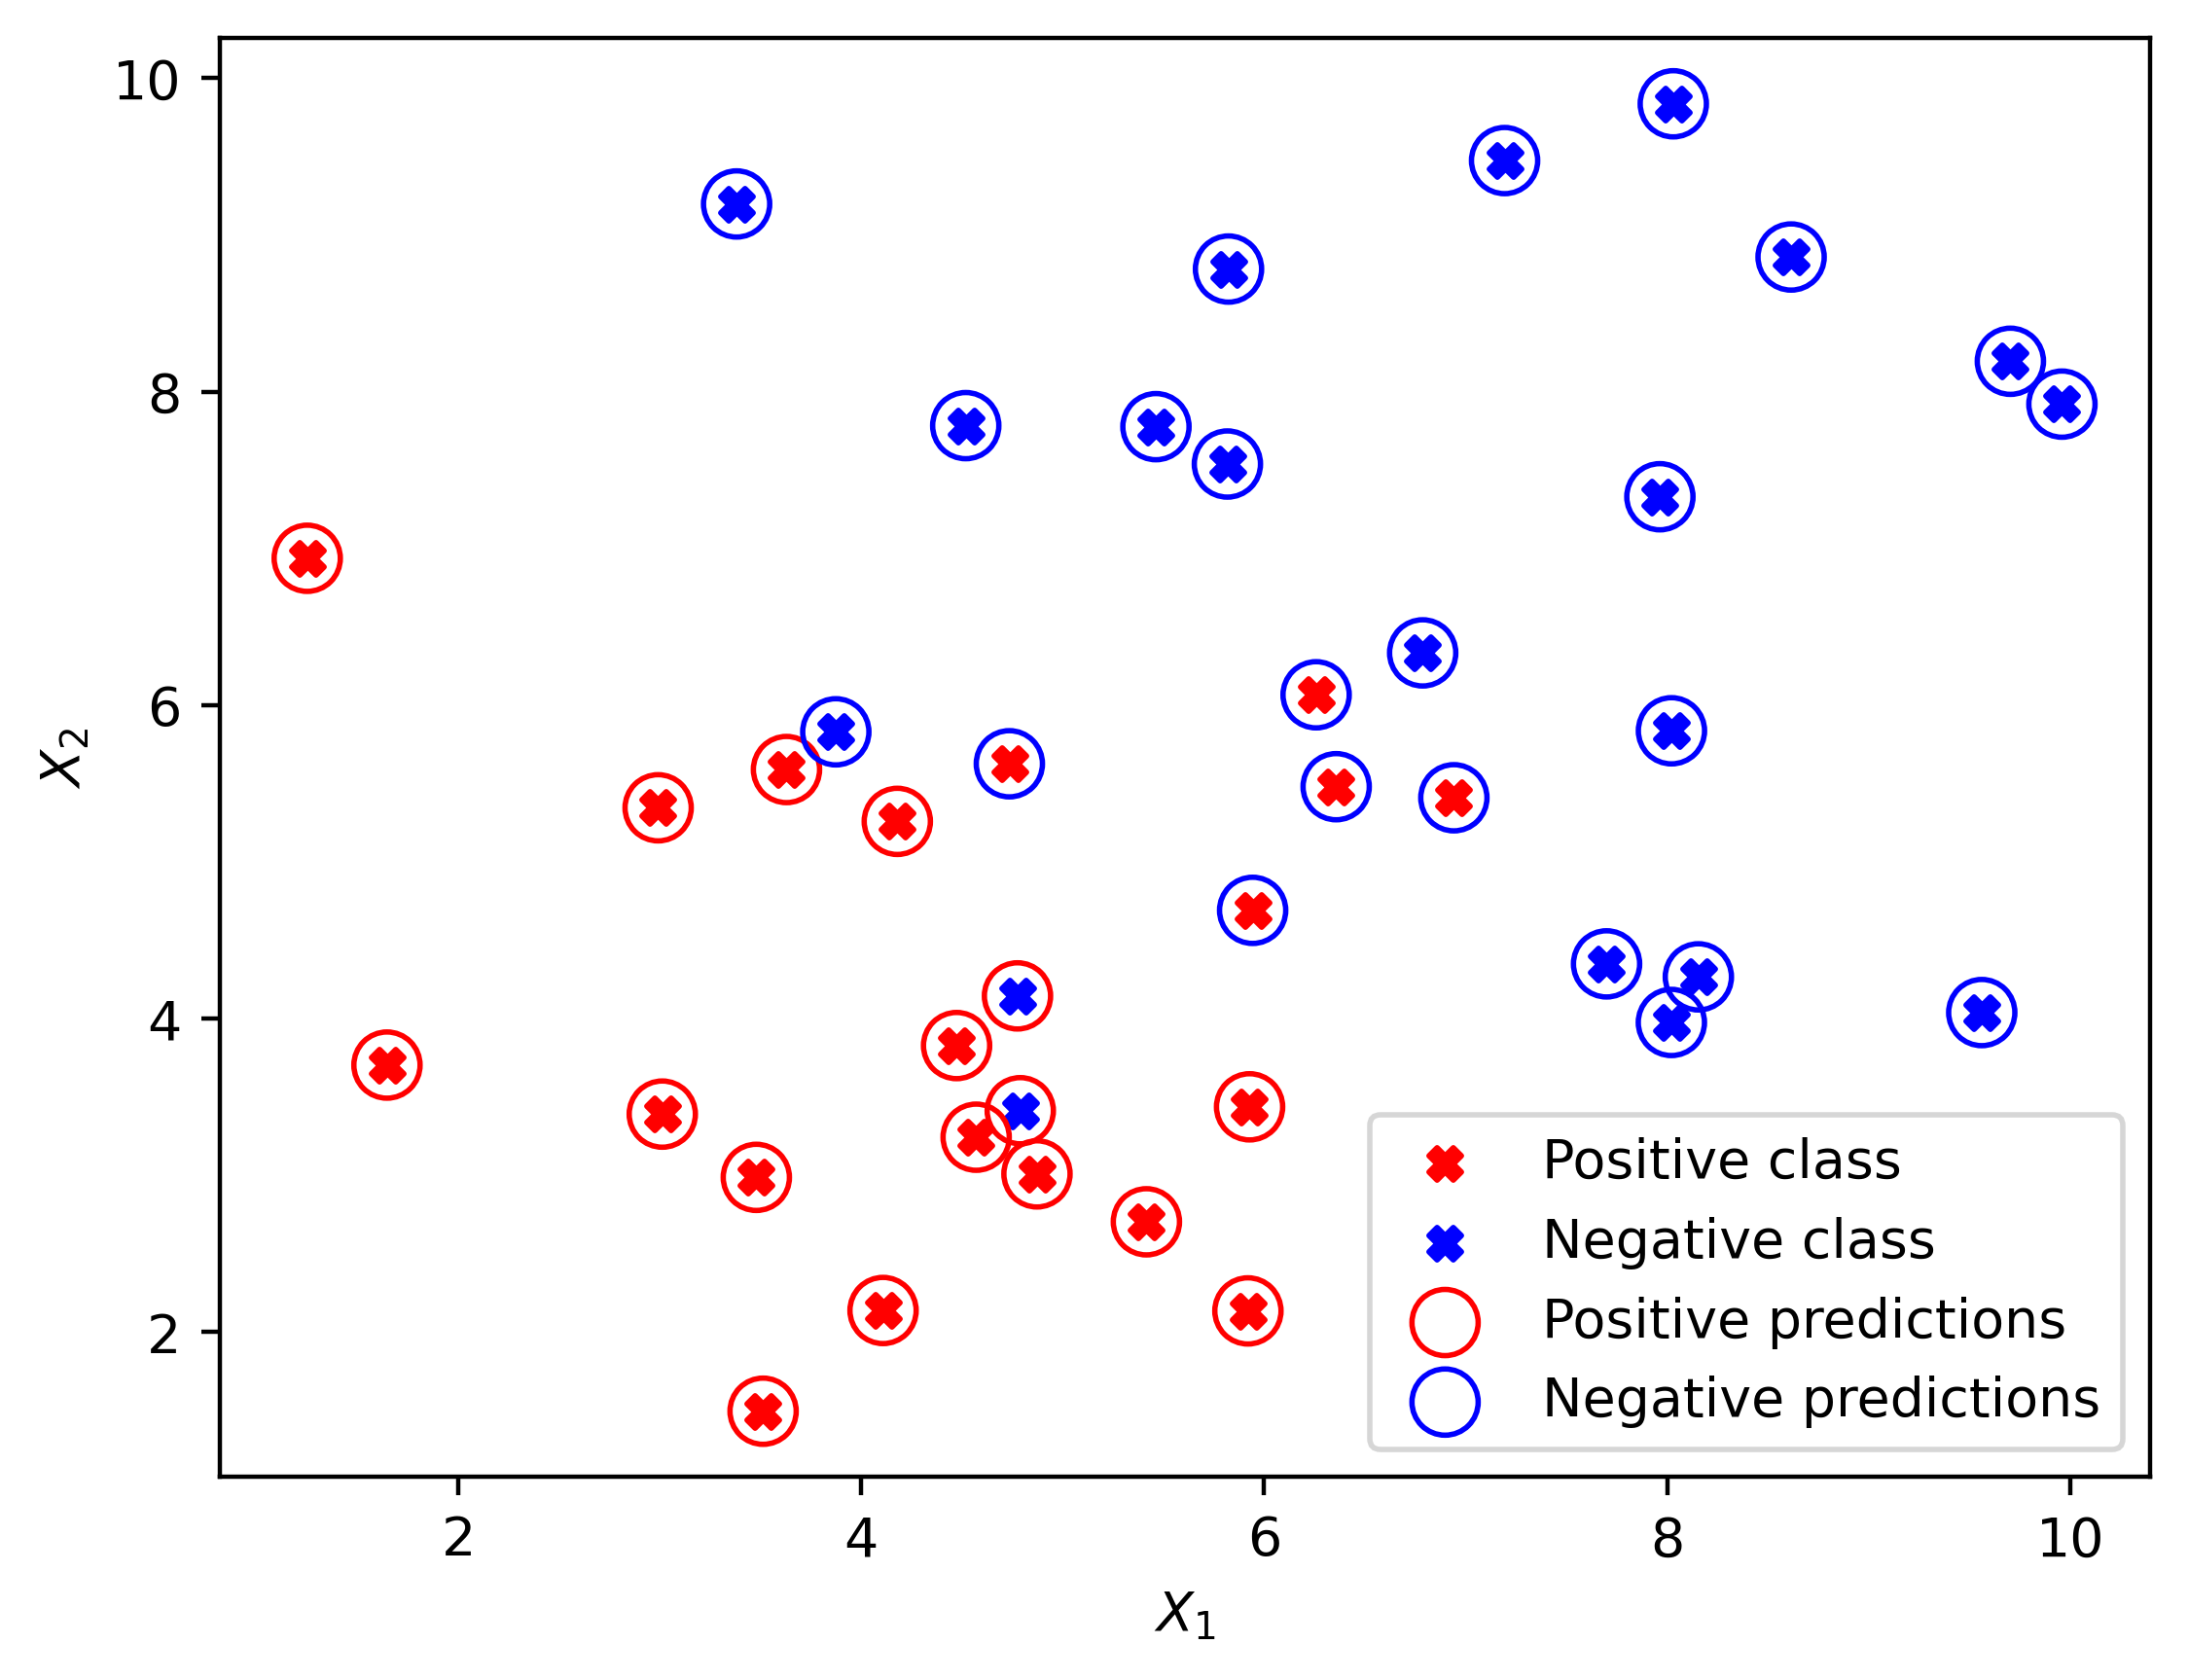

In [88]:
plt.scatter(X_1_pos, X_2_pos, color='red',marker= 'X')
plt.scatter(X_1_neg, X_2_neg, color='blue',marker= 'X')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

GET OUT THETA1, THETA2(COEFICIENTS) AND THETA 0(INTERCEPT)

In [90]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]

In [93]:
print(theta_1, theta_2)

-0.20245058016285838 -0.25336423626773225


In [94]:
theta_0 = example_lr.intercept_

In [95]:
theta_0

array([2.25479161])

MODELS COEFICIENT 1 AND 2 RETRIEVED AS WELL AS THE INTERCEPT. NOW CREATE A LINE DEFINED BY TWO POINTS ACCORDING TO THE EQUATION DESCRIBED FOR THE DECISION BOUNDARY

In [96]:
X_1_decision_boundary = np.array([0, 10])

In [97]:

X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

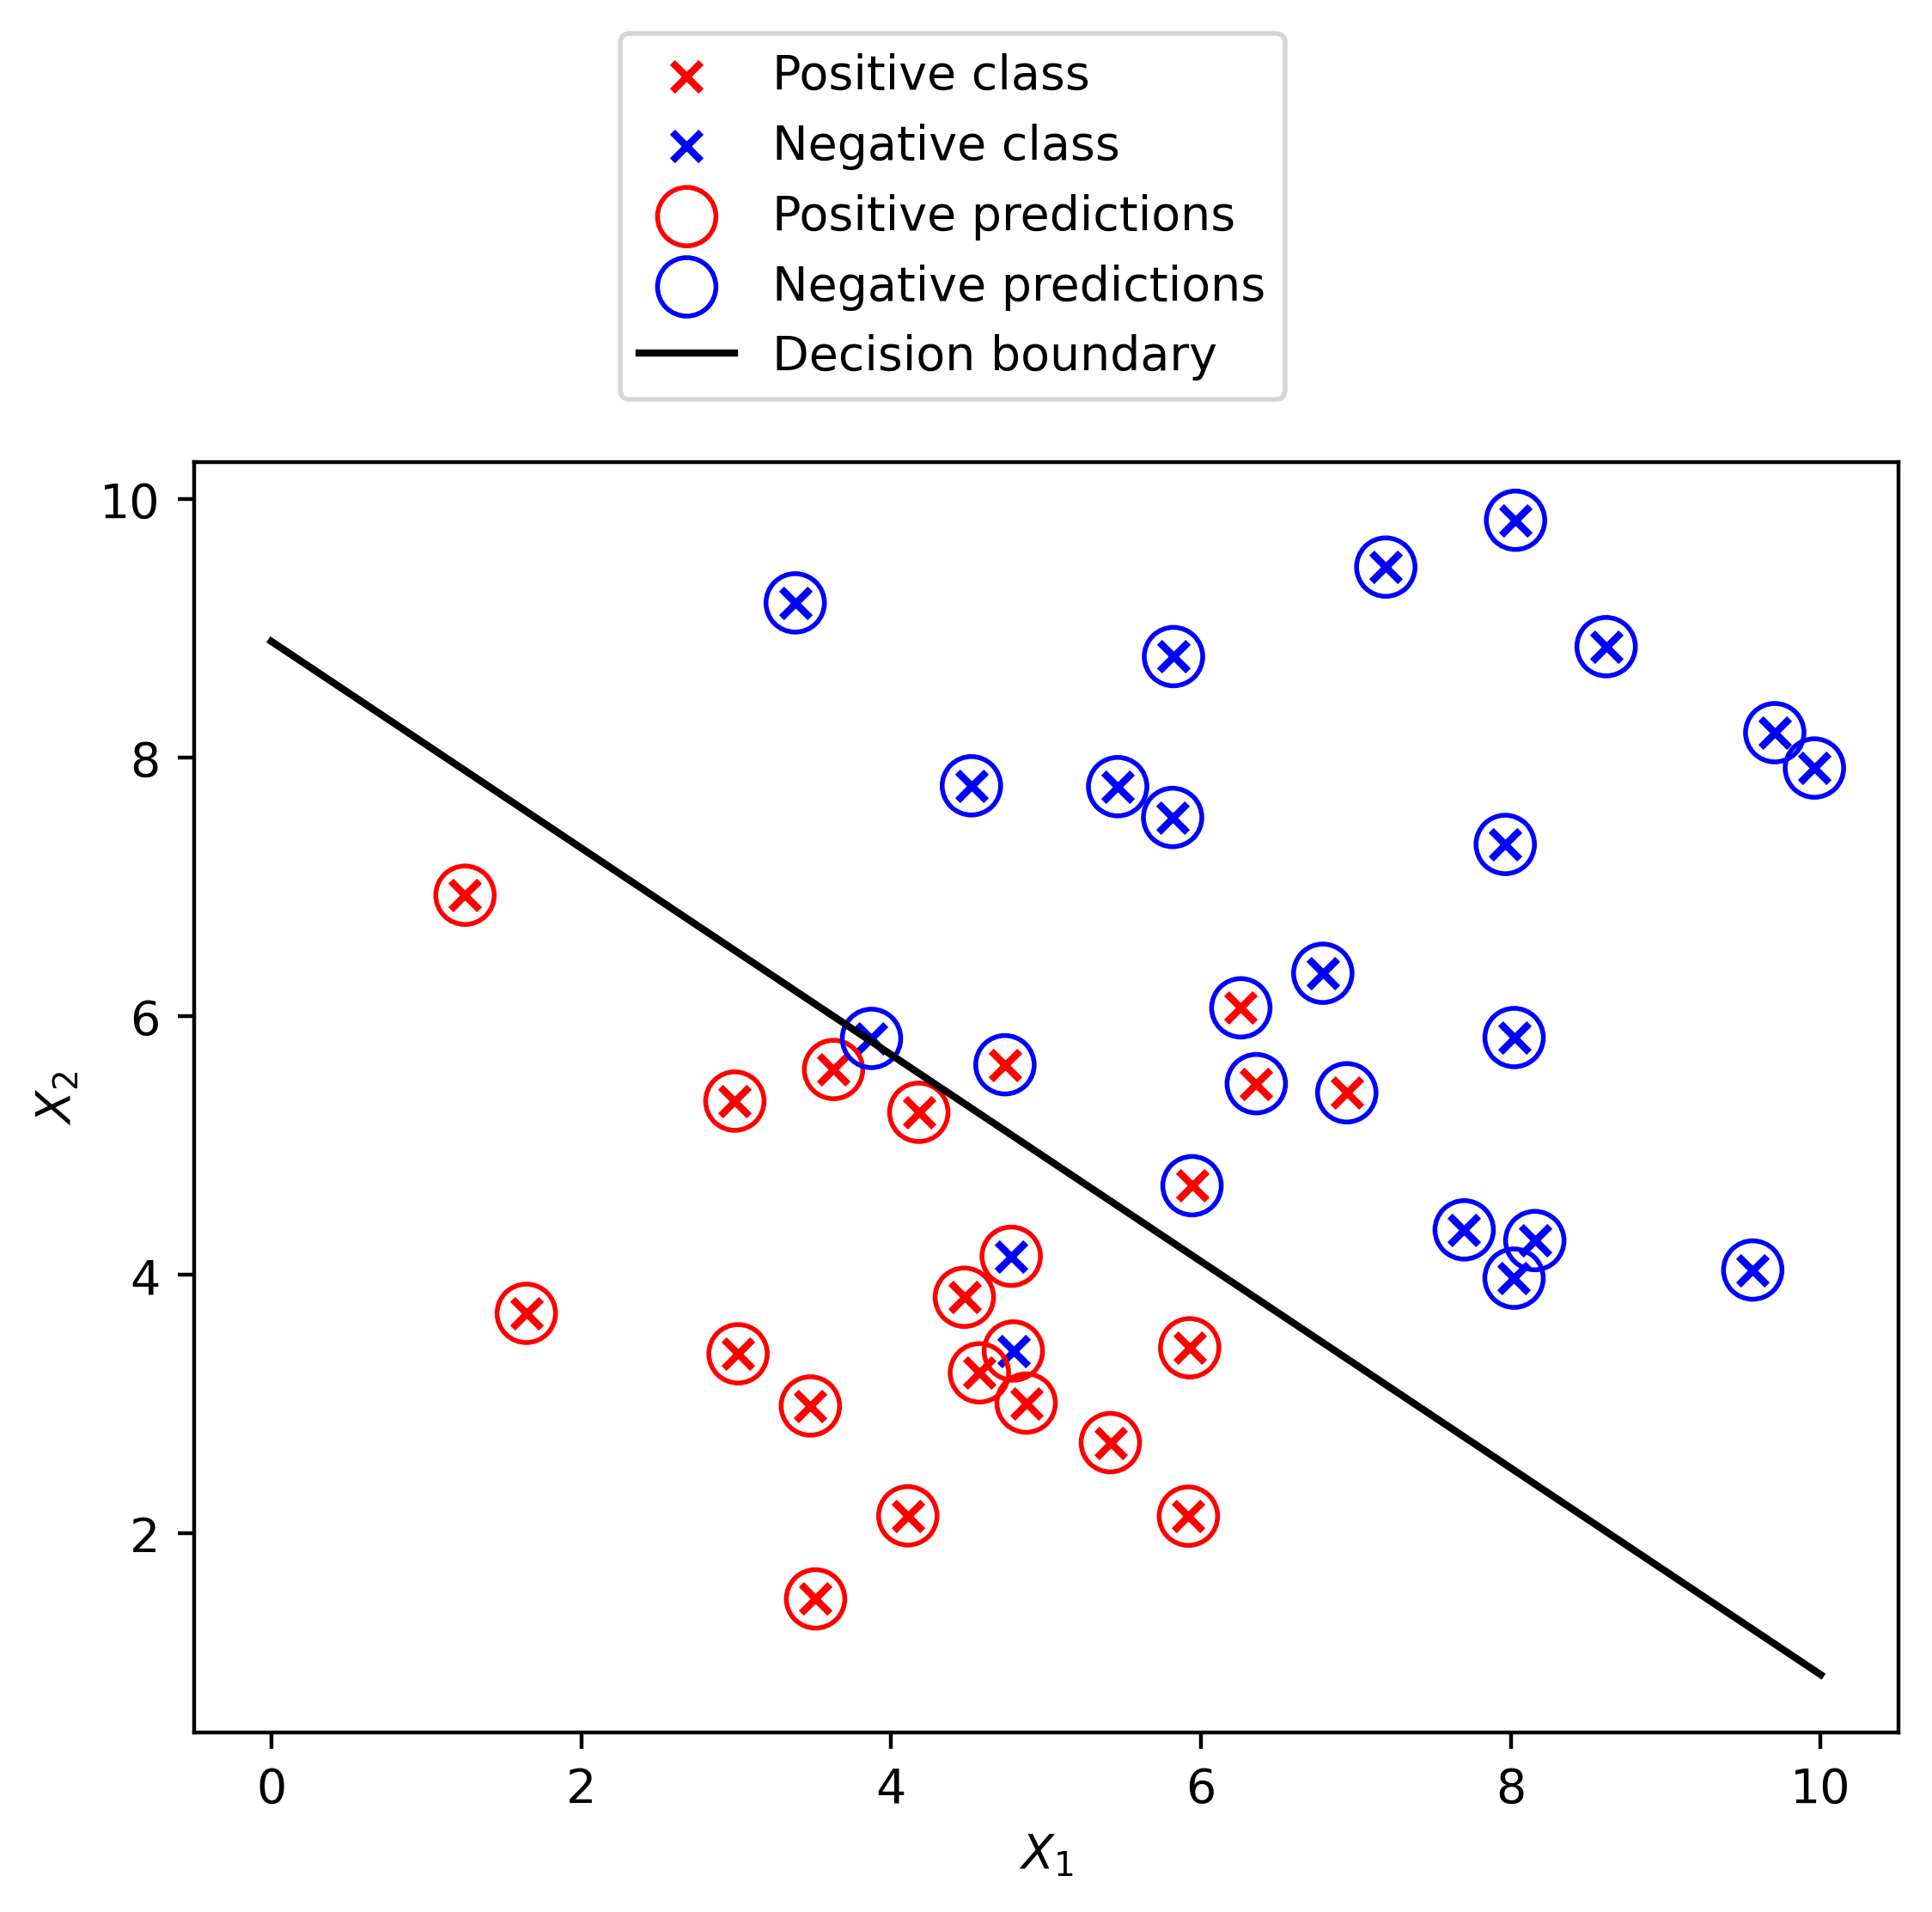

In [98]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

TRUE CLASSES, PREDICTED CLASSES AND THE DECISION BOUNDARY OF A LOGISTIC REGRESSION